In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Load Dataset

In [9]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/employee_data.csv')

# display first few rows of the dataset
df.head()

avg_monthly_hrs   department  filed_complaint  last_evaluation  n_projects  \
0              221  engineering              NaN         0.932868           4   
1              232      support              NaN              NaN           3   
2              184        sales              NaN         0.788830           3   
3              206        sales              NaN         0.575688           4   
4              249        sales              NaN         0.845217           3   

   recently_promoted  salary  satisfaction    status  tenure  
0                NaN     low      0.829896      Left     5.0  
1                NaN     low      0.834544  Employed     2.0  
2                NaN  medium      0.834988  Employed     3.0  
3                NaN     low      0.424764  Employed     2.0  
4                NaN     low      0.779043  Employed     3.0

# Data Understanding



In [10]:
# view data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [11]:
# rename column
df.rename(columns={'n_projects':'project_no','avg_monthly_hrs':'average_monthly_hour','last_evaluation':'latest_performance_evaluation'}, inplace=True)
df

average_monthly_hour   department  filed_complaint  \
0                       221  engineering              NaN   
1                       232      support              NaN   
2                       184        sales              NaN   
3                       206        sales              NaN   
4                       249        sales              NaN   
...                     ...          ...              ...   
14244                   178           IT              NaN   
14245                   257        sales              NaN   
14246                   232      finance              1.0   
14247                   130           IT              NaN   
14248                   159          NaN              NaN   

       latest_performance_evaluation  project_no  recently_promoted  salary  \
0                           0.932868           4                NaN     low   
1                                NaN           3                NaN     low   
2                           0.788830           3                NaN  medium   
3                           0.575688           4                NaN     low   
4                           0.845217           3                NaN     low   
...                              ...         ...                ...     ...   
14244                       0.735865           5                NaN     low   
14245                       0.638604           3                NaN     low   
14246                       0.847623           5                NaN  medium   
14247                       0.757184           4                NaN  medium   
14248                       0.578742           3                NaN  medium   

       satisfaction    status  tenure  
0          0.829896      Left     5.0  
1          0.834544  Employed     2.0  
2          0.834988  Employed     3.0  
3          0.424764  Employed     2.0  
4          0.779043  Employed     3.0  
...             ...       ...     ...  
14244      0.263282  Employed     5.0  
14245      0.868209  Employed     2.0  
14246      0.898917      Left     5.0  
14247      0.641304  Employed     3.0  
14248      0.808850  Employed     3.0  

[14249 rows x 10 columns]

In [12]:
# checking for missing value
df.isna().sum()

average_monthly_hour                 0
department                         709
filed_complaint                  12191
latest_performance_evaluation     1532
project_no                           0
recently_promoted                13949
salary                               0
satisfaction                       181
status                               0
tenure                             181
dtype: int64

In [14]:
# check sum of duplicated data
df.duplicated().sum()

28

In [13]:
# view duplicated data
df[df.duplicated()]

average_monthly_hour department  filed_complaint  \
2558                    126       temp              NaN   
3004                     69       temp              NaN   
3026                    101       temp              NaN   
5023                    125       temp              NaN   
5504                     85       temp              NaN   
6037                     76       temp              NaN   
6147                     85       temp              NaN   
6476                    127       temp              NaN   
6726                    125       temp              NaN   
7295                    131       temp              NaN   
7316                    117       temp              NaN   
7714                     82       temp              NaN   
8368                    135       temp              NaN   
8634                    127       temp              NaN   
8951                     87       temp              1.0   
9536                     69       temp              NaN   
9806                     66       temp              1.0   
9943                    114       temp              NaN   
10029                    69       temp              NaN   
10813                    87       temp              NaN   
11012                   103       temp              NaN   
11234                   126       temp              NaN   
12409                   100       temp              NaN   
12550                    69       temp              NaN   
12625                   101       temp              NaN   
12794                    82       temp              NaN   
13306                   126       temp              NaN   
13576                   100       temp              NaN   

       latest_performance_evaluation  project_no  recently_promoted  salary  \
2558                             NaN           2                NaN     low   
3004                             NaN           2                NaN     low   
3026                             NaN           1                NaN  medium   
5023                             NaN           2                NaN     low   
5504                             NaN           2                NaN     low   
6037                             NaN           2                NaN  medium   
6147                             NaN           2                NaN     low   
6476                             NaN           2                NaN  medium   
6726                             NaN           2                NaN  medium   
7295                             NaN           2                NaN  medium   
7316                             NaN           2                NaN  medium   
7714                             NaN           1                NaN     low   
8368                             NaN           2                NaN     low   
8634                             NaN           2                NaN  medium   
8951                             NaN           2                NaN  medium   
9536                             NaN           1                NaN     low   
9806                             NaN           2                NaN     low   
9943                             NaN           2                NaN     low   
10029                            NaN           1                NaN     low   
10813                            NaN           2                NaN     low   
11012                            NaN           1                NaN     low   
11234                            NaN           2                NaN     low   
12409                            NaN           1                NaN  medium   
12550                            NaN           1                NaN  medium   
12625                            NaN           1                NaN  medium   
12794                            NaN           1                NaN  medium   
13306                            NaN           2                NaN  medium   
13576                            NaN           1                NaN  medium   

   

# Preprocessing EDA

In [15]:
# descriptive statistics for numeric column
df.describe()

average_monthly_hour  filed_complaint  latest_performance_evaluation  \
count          14249.000000           2058.0                   12717.000000   
mean             199.795775              1.0                       0.718477   
std               50.998714              0.0                       0.173062   
min               49.000000              1.0                       0.316175   
25%              155.000000              1.0                       0.563866   
50%              199.000000              1.0                       0.724939   
75%              245.000000              1.0                       0.871358   
max              310.000000              1.0                       1.000000   

         project_no  recently_promoted  satisfaction        tenure  
count  14249.000000              300.0  14068.000000  14068.000000  
mean       3.773809                1.0      0.621295      3.497228  
std        1.253126                0.0      0.250469      1.460917  
min        1.000000                1.0      0.040058      2.000000  
25%        3.000000                1.0      0.450390      3.000000  
50%        4.000000                1.0      0.652527      3.000000  
75%        5.000000                1.0      0.824951      4.000000  
max        7.000000                1.0      1.000000     10.000000

## Plot for Numeric Variable

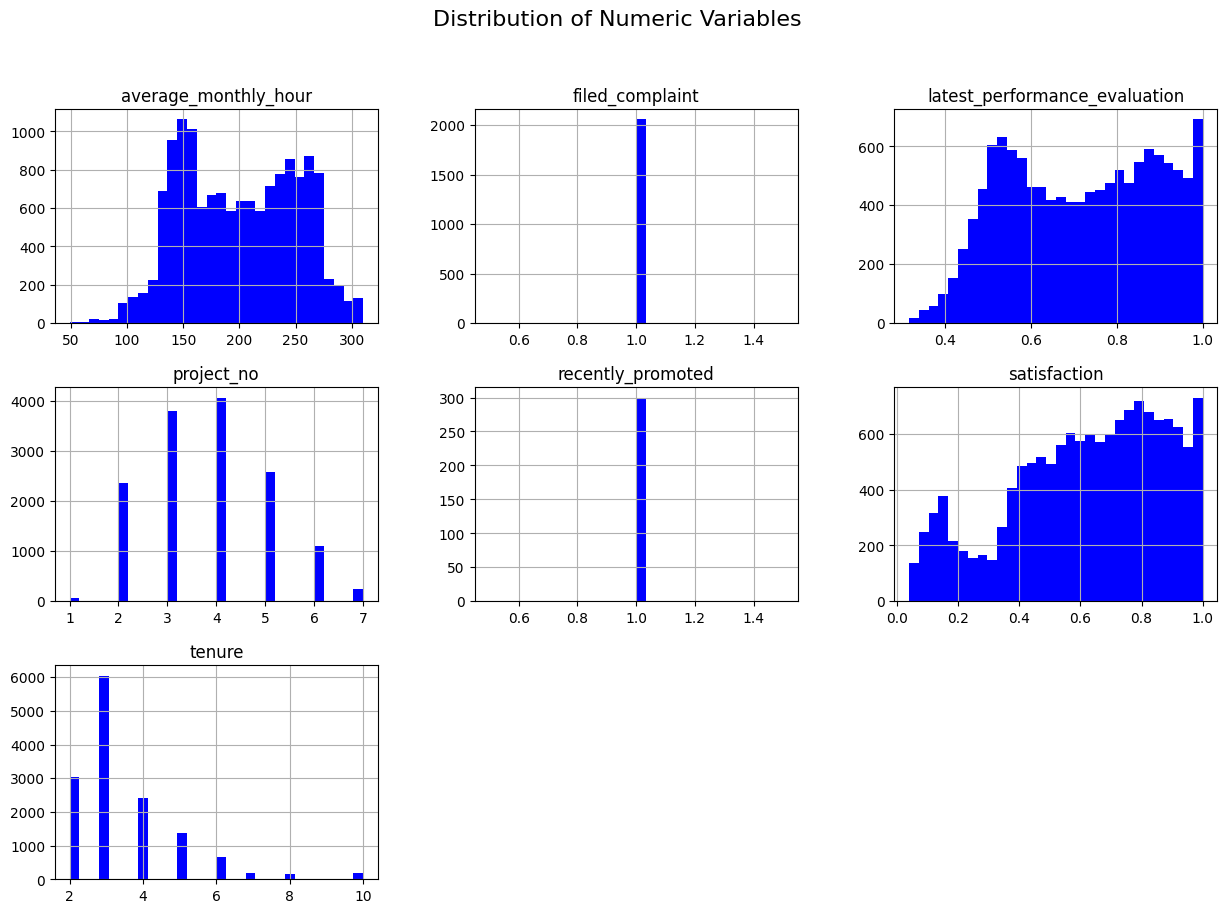

In [11]:
# Plot the distribution of numeric variables
df.hist(bins=30, figsize=(15, 10), color='blue')
plt.suptitle('Distribution of Numeric Variables', fontsize=16)
plt.show()

## Plot for Categorical Variable

<ipython-input-12-2d779465e298>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, ax=axes[i], palette="Set2")
<ipython-input-12-2d779465e298>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, ax=axes[i], palette="Set2")
<ipython-input-12-2d779465e298>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, ax=axes[i], palette="Set2")


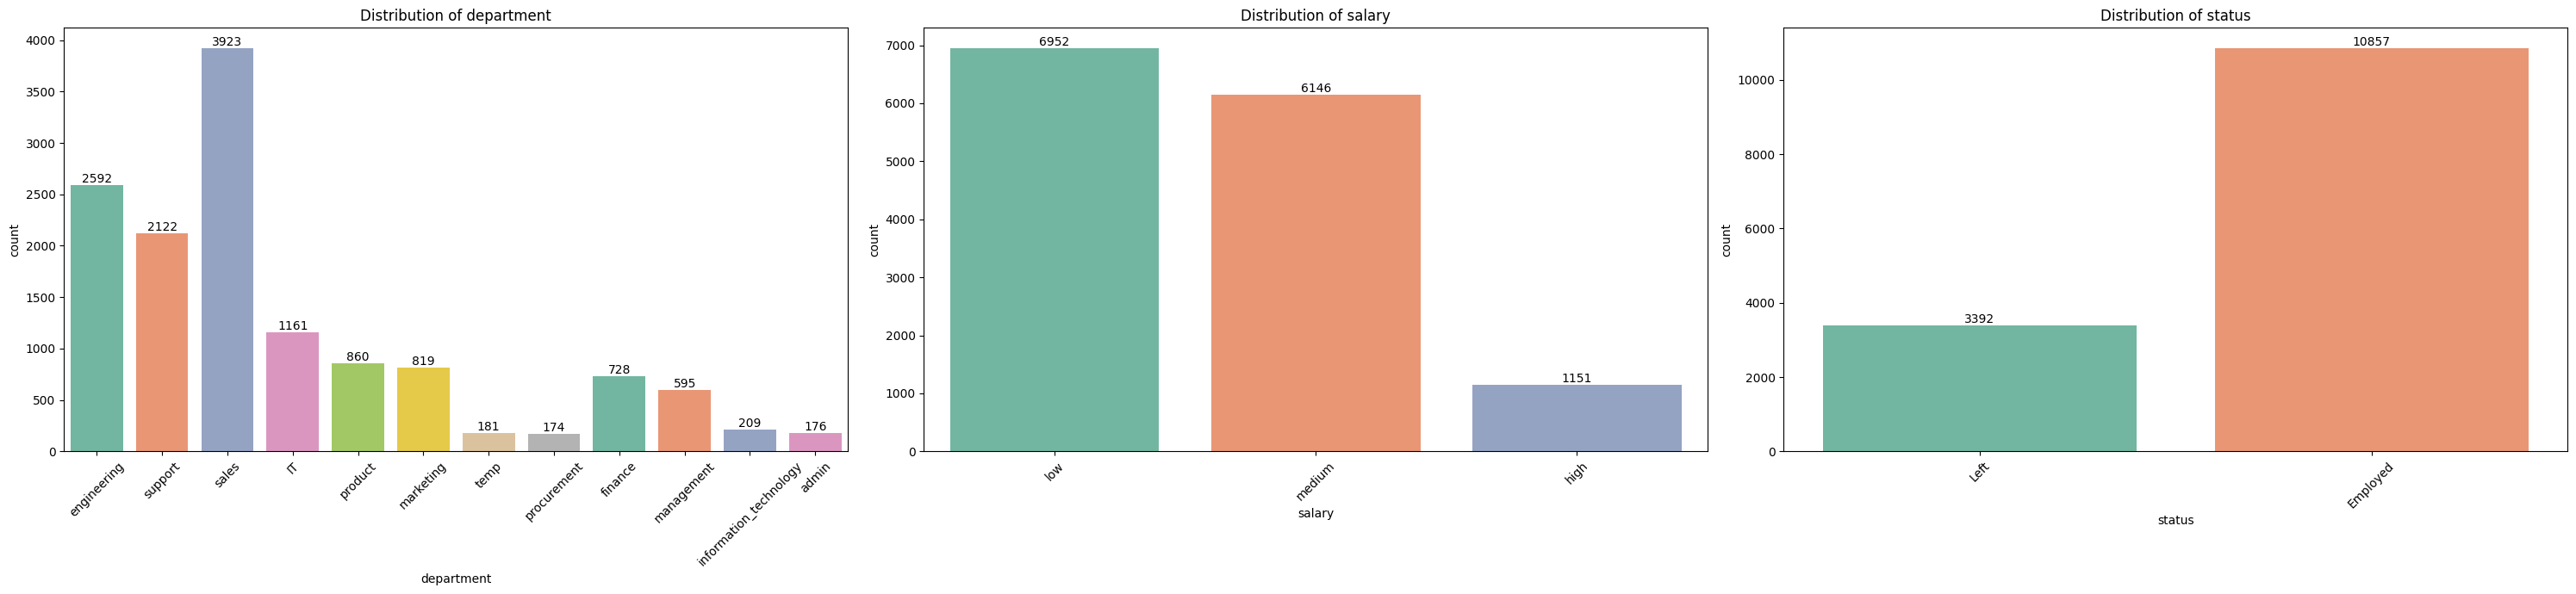

In [12]:
# Plot the distribution of categorical variables
categorical_columns = ['department', 'salary', 'status']
fig, axes = plt.subplots(1, 3, figsize=(30, 7))
for i, col in enumerate(categorical_columns):
    ax = sns.countplot(x=col, data=df, ax=axes[i], palette="Set2")
    ax.set_title(f'Distribution of {col}')
    ax.tick_params(axis='x', rotation=45)
    for container in ax.containers:
        ax.bar_label(container)
plt.tight_layout()
plt.show()

## Correlation Heatmap

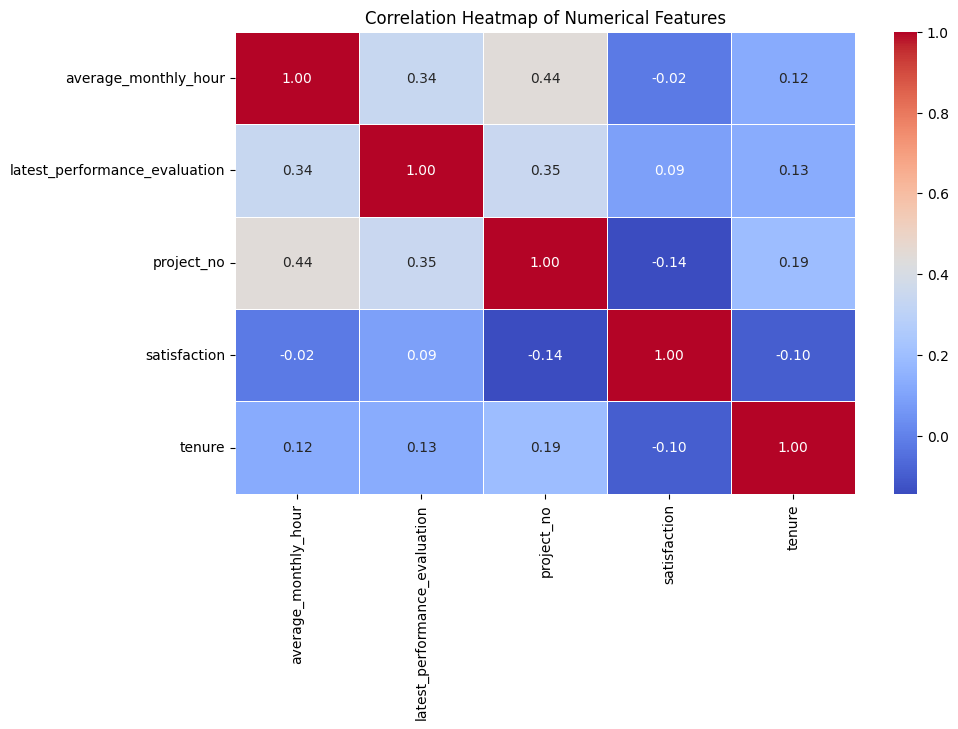

In [16]:
# Correlation heatmap for numerical columns
numerical_columns = ['average_monthly_hour', 'latest_performance_evaluation', 'project_no', 'satisfaction', 'tenure']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Plot

### Average_Monthly_Hour vs Performance Evaluation

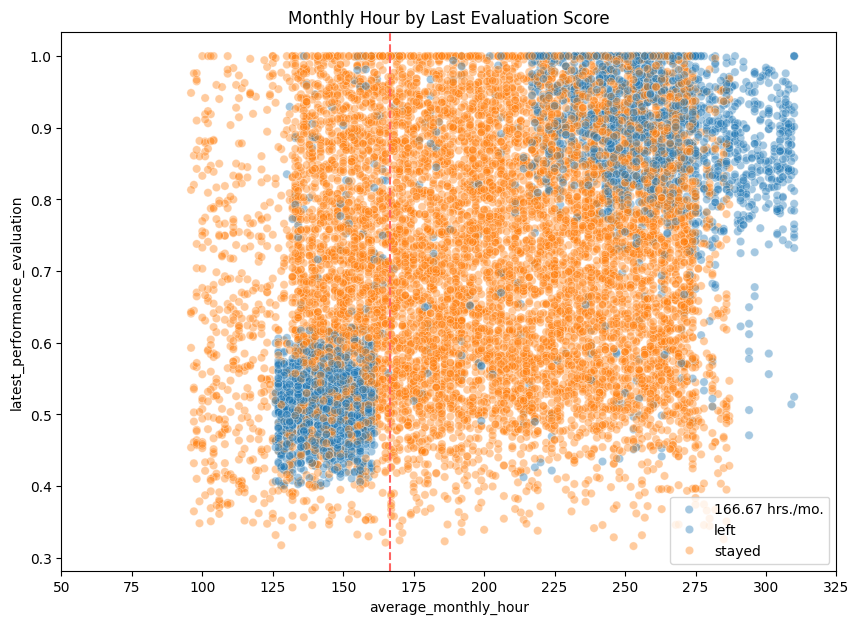

In [14]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='average_monthly_hour', y='latest_performance_evaluation', hue='status', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly Hour by Last Evaluation Score')
plt.xticks([50, 75, 100, 125, 150,175,200,225,250,275,300,325])
plt.show()

## Department

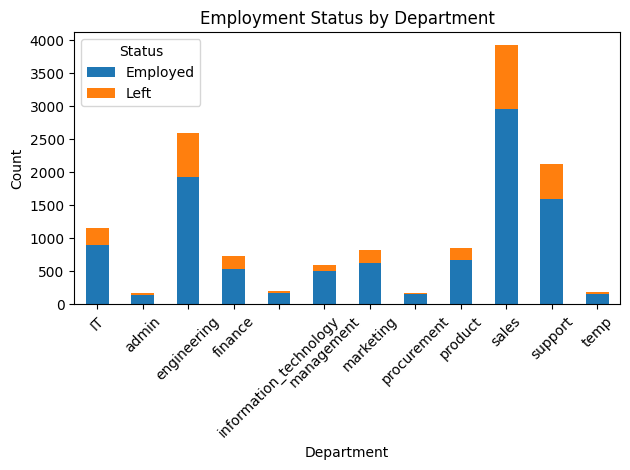

In [17]:
department_status_cross = pd.crosstab(df['department'], df['status'])

# Plotting
department_status_cross.plot(kind='bar', stacked=True)
plt.title('Employment Status by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Status')
plt.tight_layout()
plt.show()

## Project_No

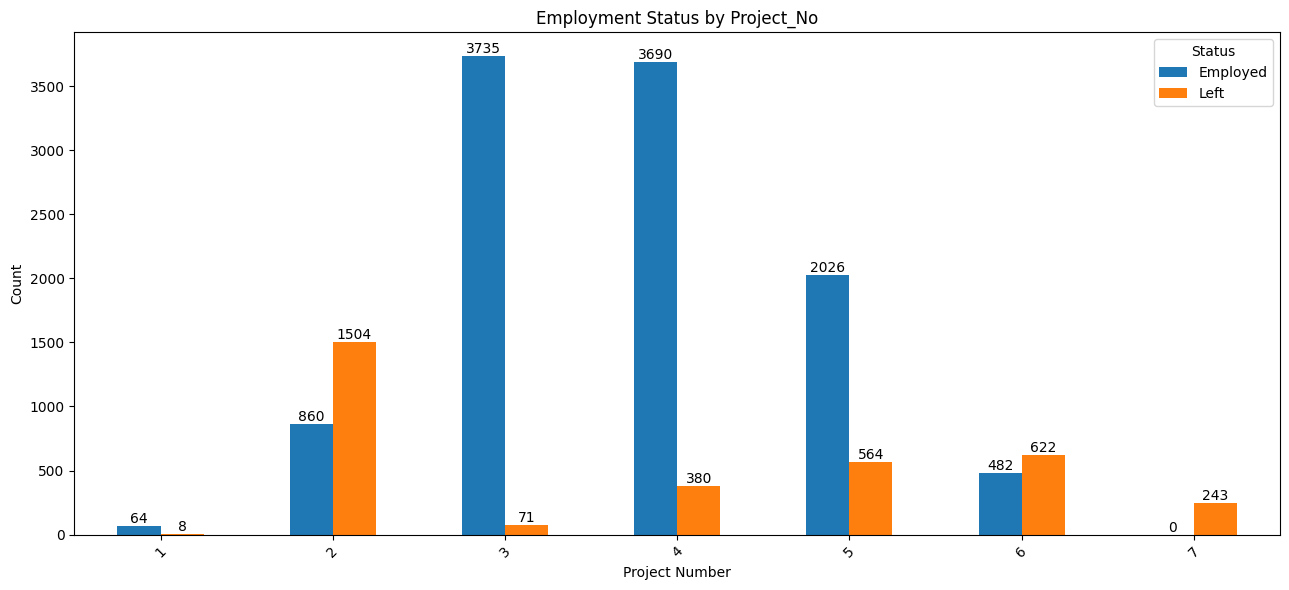

In [18]:
project_status_cross = pd.crosstab(df['project_no'], df['status'])

ax = project_status_cross.plot(kind='bar', stacked=False, figsize=(13, 6))
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('Employment Status by Project_No')
plt.xlabel('Project Number')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [16]:
# copy data frame to another new data frame
df1 = df.copy()

## Standardize

In [17]:
# Standardize the department names by merging 'IT' and 'information_technology' into 'IT'
df1['department'] = df1['department'].replace('information_technology', 'IT')

In [18]:
df1['department'].unique()

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'temp', 'procurement', 'finance', nan, 'management', 'admin'],
      dtype=object)

## Handle Missing Value

In [19]:
# fill missing 'department' with 'other'
df1['department'] = df1['department'].fillna('other')

# fill missing 'filed_complaint' with '0' (No)
df1['filed_complaint'] = df1['filed_complaint'].fillna(0).astype(int)

# fill missing 'recently_promoted' with '0' (No)
df1['recently_promoted'] = df1['recently_promoted'].fillna(0).astype(int)

# fill missing 'last_evaluation' with the mean (average)
df1['latest_performance_evaluation'] = df1['latest_performance_evaluation'].fillna(df['latest_performance_evaluation'].mean())

# fill missing 'satisfaction' with the mean (average)
df1['satisfaction'] = df1['satisfaction'].fillna(df['satisfaction'].mean())

# fill missing 'tenure' with the mean (average)
df1['tenure'] = df1['tenure'].fillna(df['tenure'].mean())

# check is there are any remaining missing value
df1.isnull().sum()

average_monthly_hour             0
department                       0
filed_complaint                  0
latest_performance_evaluation    0
project_no                       0
recently_promoted                0
salary                           0
satisfaction                     0
status                           0
tenure                           0
dtype: int64

## Outlier

<ipython-input-20-de77fd2cd31b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  bp.set_xticklabels(bp.get_xticklabels(),rotation=90)


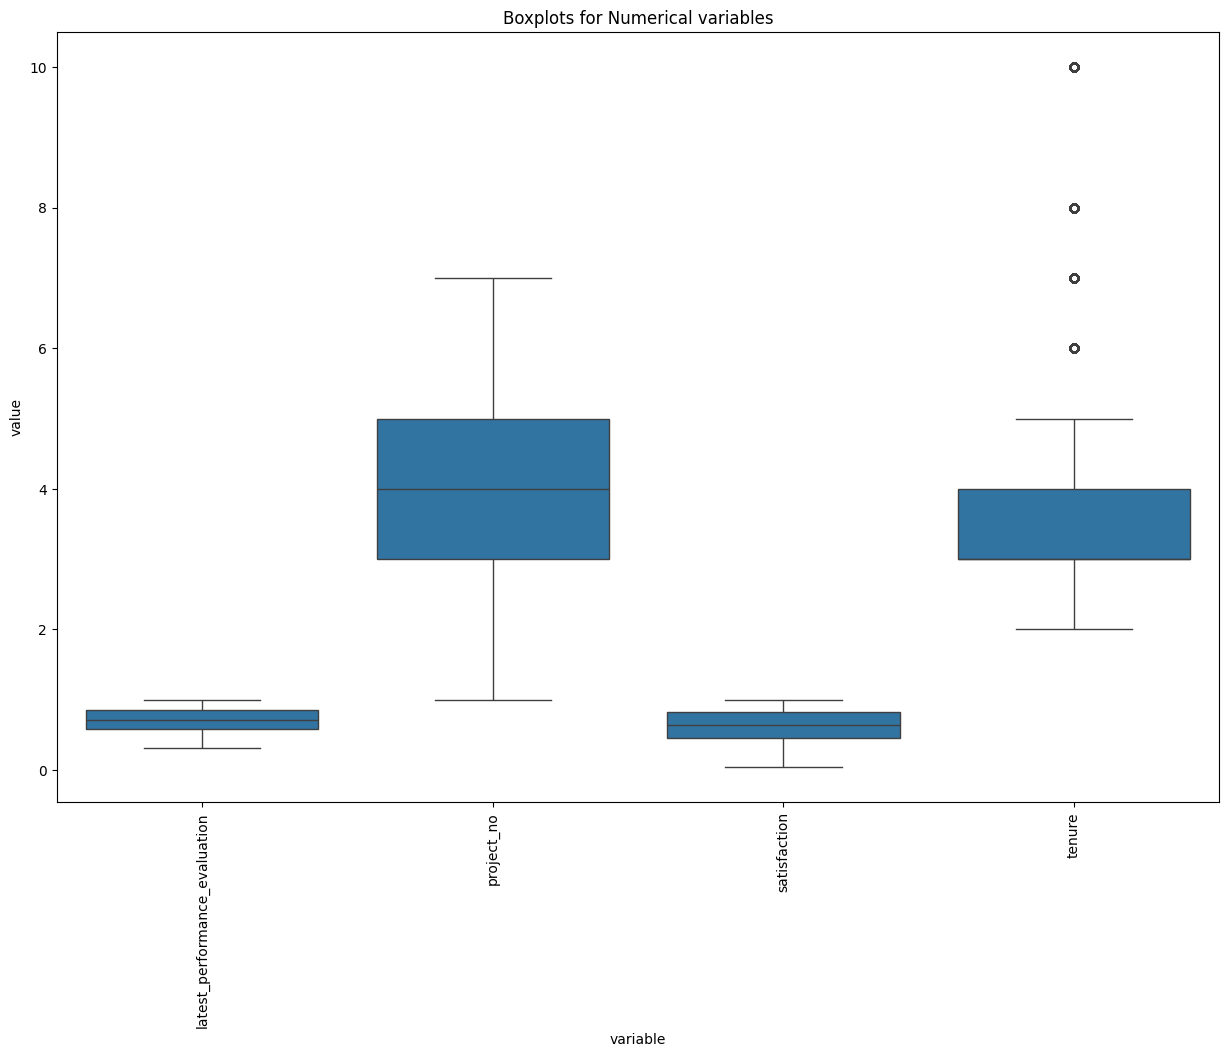

In [20]:
value=df1[['latest_performance_evaluation','project_no','satisfaction','tenure']]
NewNumericMelt=value.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp=sns.boxplot(x='variable',y='value',data=NewNumericMelt)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

In [21]:
# Count of rows where tenure is greater than 6
count = (df1["tenure"] > 6).sum()
percentage = 100 * (df1["tenure"] > 6).sum() / df1.shape[0]
print("Tenure greater than 6 \nCount:", count)
print(f"Percentage: {percentage:.2f}%")

Tenure greater than 6 
Count: 537
Percentage: 3.77%


In [22]:
above6years = df1[df1['tenure'] > 6]
(above6years['status'] == 'Left').sum()

0

In [23]:
# saving all the people who are working only less then 6 years
df1 = df1[df1['tenure'] < 6]

## Feature Engineering

In [24]:
df1['work_life_balance'] = df1['average_monthly_hour'] * df1['satisfaction']

In [25]:
# Define the bin edges and labels
bin_edges = [0, 5, 10, 20]  # These edges define the ranges for the bins
bin_labels = ['Short-term', 'Medium-term', 'Long-term']

# Create a new column 'tenure_category' with the binned data
df1['tenure_category'] = pd.cut(df1['tenure'], bins=bin_edges, labels=bin_labels, right=False)

# Replace the original 'tenure' column with 'tenure_category'
df1['tenure'] = df1['tenure_category']
df1.drop('tenure_category', axis=1, inplace=True)


bins = [0, 75, 150, 225, 290]
labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new column 'work_life_balance' with the binned data
df1['work_life_balance_binned'] = pd.cut(df1['work_life_balance'], bins=bins, labels=labels, right=False)

df1['work_life_balance'] = df1['work_life_balance_binned']
df1.drop('work_life_balance_binned', axis=1, inplace=True)

print(df1)

       average_monthly_hour   department  filed_complaint  \
0                       221  engineering                0   
1                       232      support                0   
2                       184        sales                0   
3                       206        sales                0   
4                       249        sales                0   
...                     ...          ...              ...   
14244                   178           IT                0   
14245                   257        sales                0   
14246                   232      finance                1   
14247                   130           IT                0   
14248                   159        other                0   

       latest_performance_evaluation  project_no  recently_promoted  salary  \
0                           0.932868           4                  0     low   
1                           0.718477           3                  0     low   
2                           0.

## Data Transformation

In [26]:
df2 = df1.copy()

# initialize the LabelEncoder
label_encoder = LabelEncoder()

# encode categorical variables
df2['status'] = label_encoder.fit_transform(df2['status'])
df2['salary'] = label_encoder.fit_transform(df2['salary'])
df2['department'] = label_encoder.fit_transform(df2['department'])
df2['tenure'] = label_encoder.fit_transform(df2['tenure'])
df2['work_life_balance'] = label_encoder.fit_transform(df2['work_life_balance'])

## Normalization

In [27]:
# create a MinMaxScaler instance
scaler = MinMaxScaler()

# scale numeric features
numerical_columns = df2.select_dtypes(include=['float64', 'int64']).drop(columns=['status']).columns

# apply min-max scaling
df2[numerical_columns] = scaler.fit_transform(df2[numerical_columns])

# display the first few rows of the normalized data
df2.head()

average_monthly_hour  department  filed_complaint  \
0              0.659004    0.181818              0.0   
1              0.701149    0.909091              0.0   
2              0.517241    0.818182              0.0   
3              0.601533    0.818182              0.0   
4              0.766284    0.818182              0.0   

   latest_performance_evaluation  project_no  recently_promoted  salary  \
0                       0.901828    0.500000                0.0     0.5   
1                       0.588311    0.333333                0.0     0.5   
2                       0.691193    0.333333                0.0     1.0   
3                       0.379502    0.500000                0.0     0.5   
4                       0.773652    0.333333                0.0     0.5   

   satisfaction  status  tenure  work_life_balance  
0      0.822798       1     0.0           0.000000  
1      0.827639       0     1.0           0.000000  
2      0.828102       0     1.0           0.000000  
3      0.400760       0     1.0           0.666667  
4      0.769823       0     1.0           0.000000

## Balance Data

In [28]:
# Get numbers and percentages of people who left vs. stayed
counts = df2['status'].value_counts()
percentages = df2['status'].value_counts(normalize=True) * 100

# Display the counts and percentages side by side
print("status")
for label, count in counts.items():
    print(f"{label}   {count} ({percentages[label]:.2f}%)")

status
0   9848 (75.48%)
1   3200 (24.52%)


In [29]:
# Separate features and target variable
X = df2.drop(columns=['status'])
y = df2['status']

# Initialize SMOTE for oversampling
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target into a new DataFrame
df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['status'])], axis=1)

# Check the distribution of the 'status' column after balancing
print(df_balanced['status'].value_counts())

status
1    9848
0    9848
Name: count, dtype: int64


## Feature Importance

In [30]:
from sklearn.feature_selection import f_classif
X_resampled = df_balanced.drop(columns=['status'])
y_resampled = df_balanced['status']

# Calculate ANOVA F-statistic for each feature
f_values, p_values = f_classif(X_resampled, y_resampled)

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_resampled.columns,
    'F-Value': f_values,
    'p-Value': p_values
})

# Sort the DataFrame by F-Value
importance_df = importance_df.sort_values(by='F-Value', ascending=False)

# Display the updated DataFrame
print(importance_df)

                         Feature      F-Value        p-Value
7                   satisfaction  5887.413646   0.000000e+00
8                         tenure  1384.408449  6.622358e-293
2                filed_complaint   907.262590  6.698752e-195
9              work_life_balance   617.348291  3.276507e-134
5              recently_promoted   100.585145   1.292292e-23
0           average_monthly_hour    67.586562   2.140107e-16
4                     project_no     4.993405   2.545526e-02
6                         salary     1.472554   2.249577e-01
3  latest_performance_evaluation     0.189813   6.630774e-01
1                     department     0.157636   6.913469e-01


In [31]:
# Set a p-value threshold
threshold_p_value = 0.05

# Select important features based on the threshold
important_features = importance_df[importance_df['p-Value'] < threshold_p_value]['Feature'].tolist()

# Create a new DataFrame with only the selected features
X_selected = X_resampled[important_features]

print(f"Selected Important Features (p < {threshold_p_value}):", X_selected.columns.tolist())

Selected Important Features (p < 0.05): ['satisfaction', 'tenure', 'filed_complaint', 'work_life_balance', 'recently_promoted', 'average_monthly_hour', 'project_no']


## Data Partition

In [32]:
# Define the features and target variable
X = X_selected  # Use the selected features from the feature selection step
y = y_resampled  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Display the shape of the partitions
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (15756, 7)
Testing Set Shape: (3940, 7)


# EDA


## Summary Statistic

In [36]:
# Summary Statistics
df_balanced.describe()

average_monthly_hour    department  filed_complaint  \
count          19696.000000  19696.000000     19696.000000   
mean               0.581684      0.542092         0.106874   
std                0.211070      0.325586         0.308961   
min                0.000000      0.000000         0.000000   
25%                0.385019      0.181818         0.000000   
50%                0.567050      0.659111         0.000000   
75%                0.773946      0.818182         0.000000   
max                1.000000      1.000000         1.000000   

       latest_performance_evaluation    project_no  recently_promoted  \
count                   19696.000000  19696.000000       19696.000000   
mean                        0.586337      0.460734           0.012980   
std                         0.250658      0.249619           0.112783   
min                         0.000000      0.000000           0.000000   
25%                         0.347794      0.166667           0.000000   
50%                         0.588311      0.500000           0.000000   
75%                         0.808721      0.666667           0.000000   
max                         1.000000      1.000000           1.000000   

             salary  satisfaction        tenure  work_life_balance  \
count  19696.000000  19696.000000  19696.000000       19696.000000   
mean       0.673093      0.536138      0.847431           0.370527   
std        0.292228      0.277219      0.359581           0.279026   
min        0.000000      0.000000      0.000000           0.000000   
25%        0.500000      0.357253      1.000000           0.000000   
50%        0.500000      0.534782      1.000000           0.333333   
75%        1.000000      0.779607      1.000000           0.666667   
max        1.000000      1.000000      1.000000           1.000000   

             status  
count  19696.000000  
mean       0.500000  
std        0.500013  
min        0.000000  
25%        0.000000  
50%        0.500000  
75%        1.000000  
max        1.000000

## Correlation Heatmap

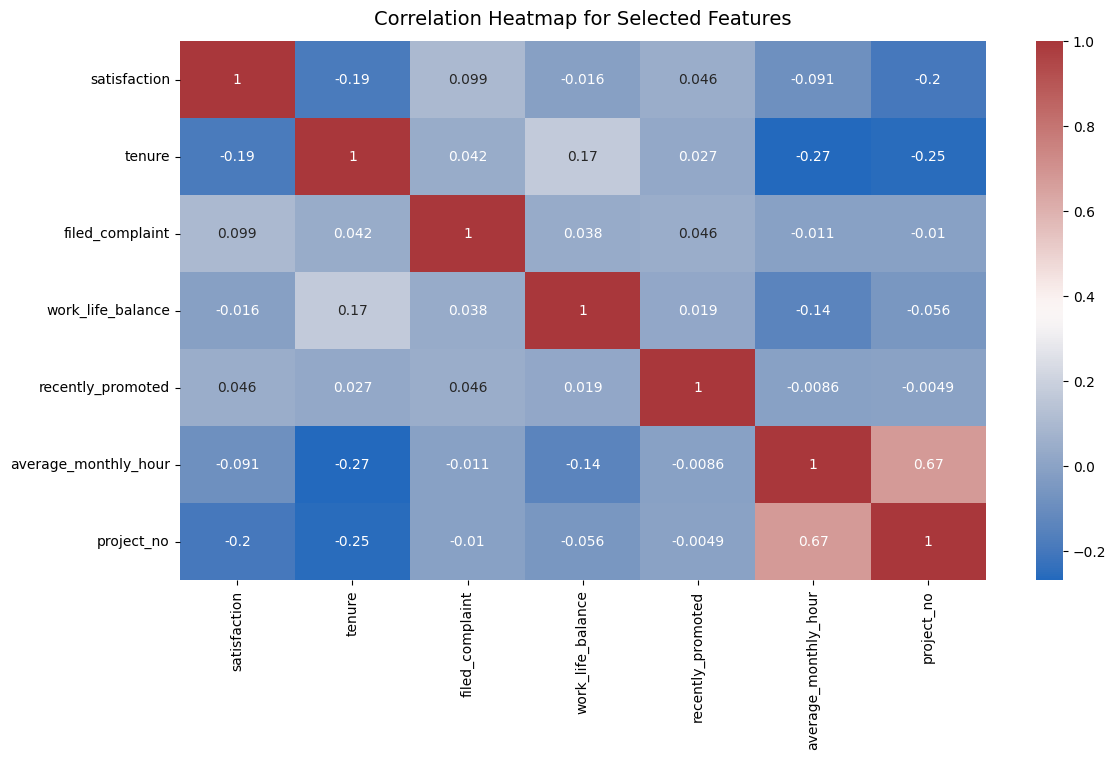

In [37]:
# Correlation Heatmap
plt.figure(figsize=(13, 7))
sns.heatmap(X_selected.corr(), annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
plt.title('Correlation Heatmap for Selected Features', fontdict={'fontsize': 14}, pad=12)
plt.show()

## Pairplot

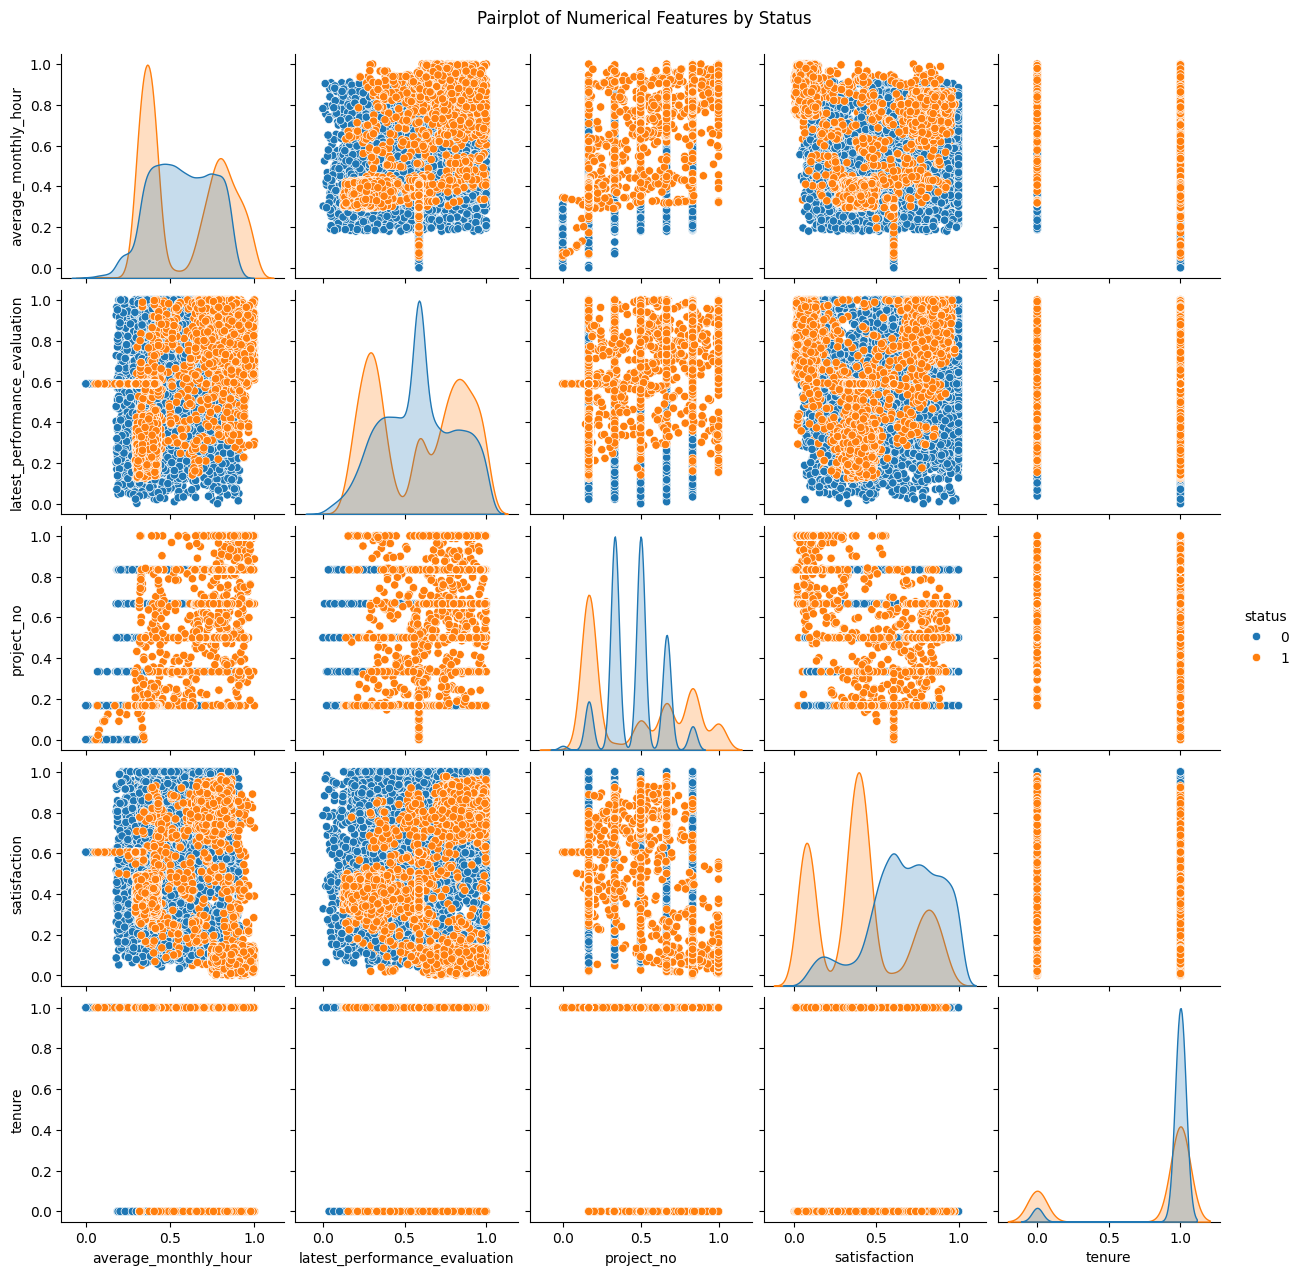

In [38]:
# Pairplot to visualize pairwise relationships between selected features, colored by 'status'
sns.pairplot(df_balanced, hue='status', diag_kind='kde',
             vars=['average_monthly_hour', 'latest_performance_evaluation', 'project_no', 'satisfaction', 'tenure'])
plt.suptitle('Pairplot of Numerical Features by Status', y=1.02)
plt.show()

## Department

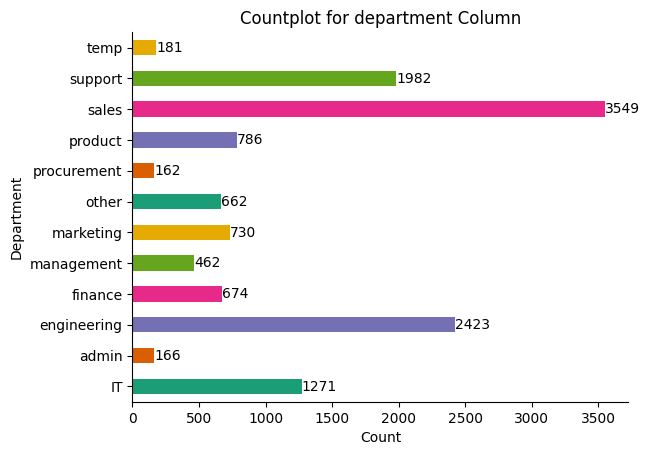

In [39]:
# Department
# Group by department and count occurrences
counts = df1.groupby('department').size()

# Plot
ax = counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Annotating the bars with the values
for i, value in enumerate(counts):
    ax.text(value, i, f'{value}', va='center', ha='left')

# Customize plot
ax.spines[['top', 'right']].set_visible(False)
plt.xlabel('Count')
plt.ylabel('Department')
plt.title('Countplot for department Column')

plt.show()

## Salary vs Status

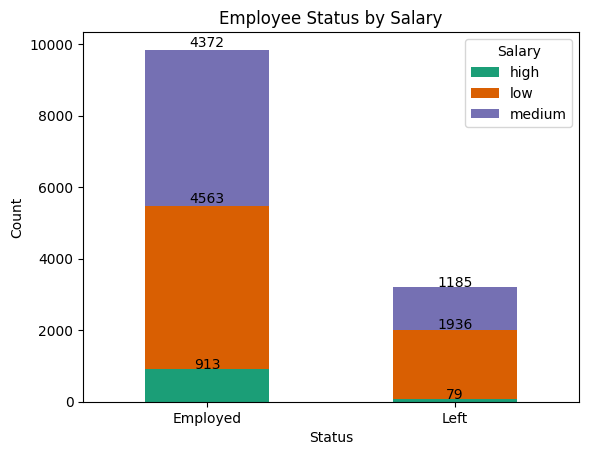

In [40]:
# Salary vs Status
# Group by status and salary, and count the occurrences
status_salary_counts = df1.groupby(['status', 'salary']).size().unstack(fill_value=0)

# Plot
ax = status_salary_counts.plot(kind='bar', stacked=True, color=sns.palettes.mpl_palette('Dark2'))
plt.title('Employee Status by Salary')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Salary')

# Add labels on top of each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height*1.02), ha='center')

plt.show()

## Project_No vs Status

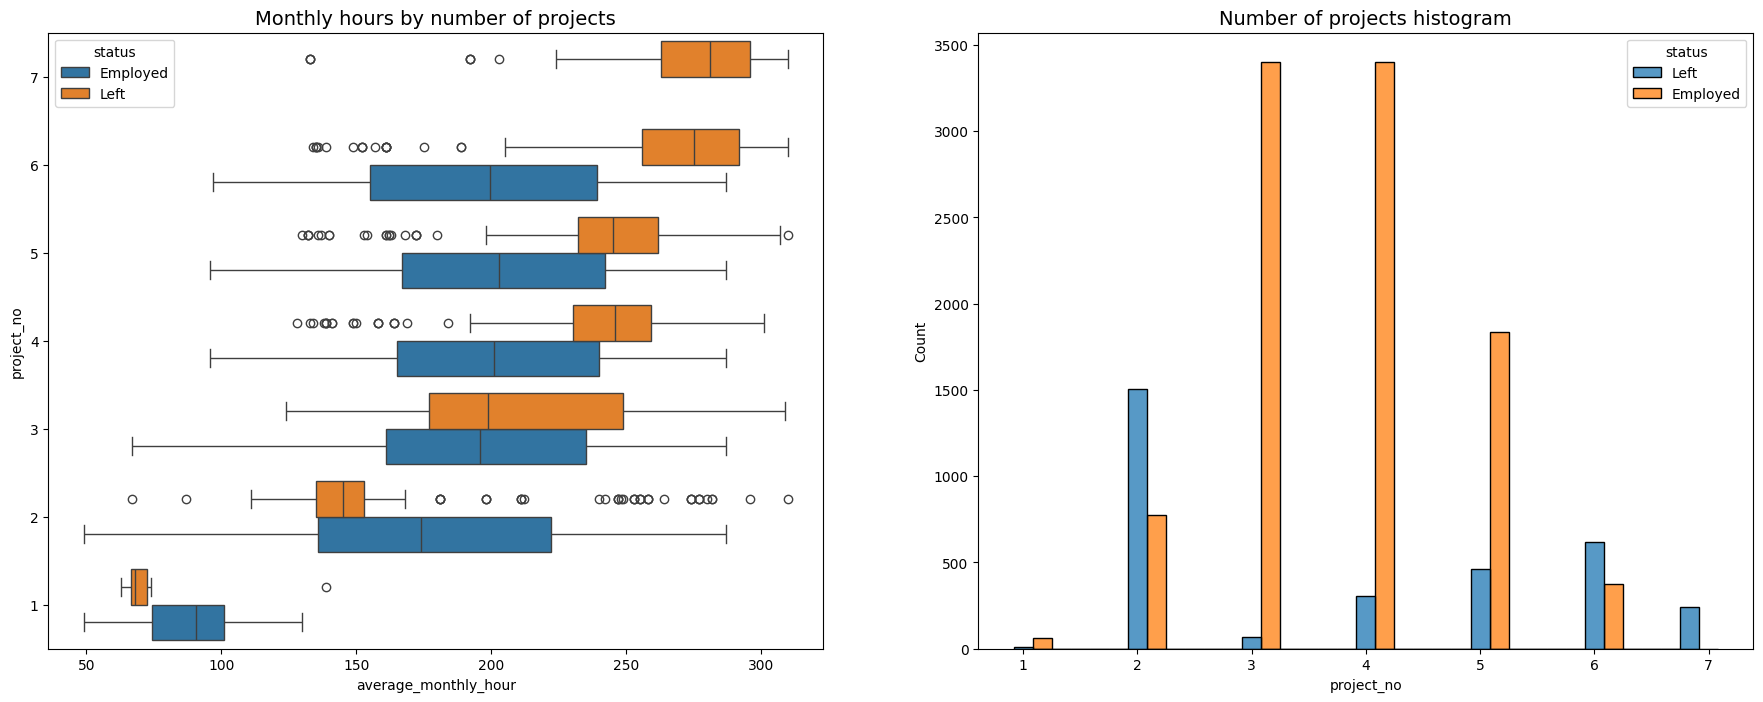

In [41]:
# Project vs Status
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`
sns.boxplot(data=df1, x='average_monthly_hour', y='project_no', hue='status', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`
tenure_stay = df1[df1['status']==0]['project_no']
tenure_left = df1[df1['status']==1]['project_no']
sns.histplot(data=df1, x='project_no', hue='status', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

In [ ]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['project_no']==7]['status'].value_counts()

status
Left    243
Name: count, dtype: int64

## Satisfaction vs Status

<ipython-input-42-714e14b5f31e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(bin_labels)


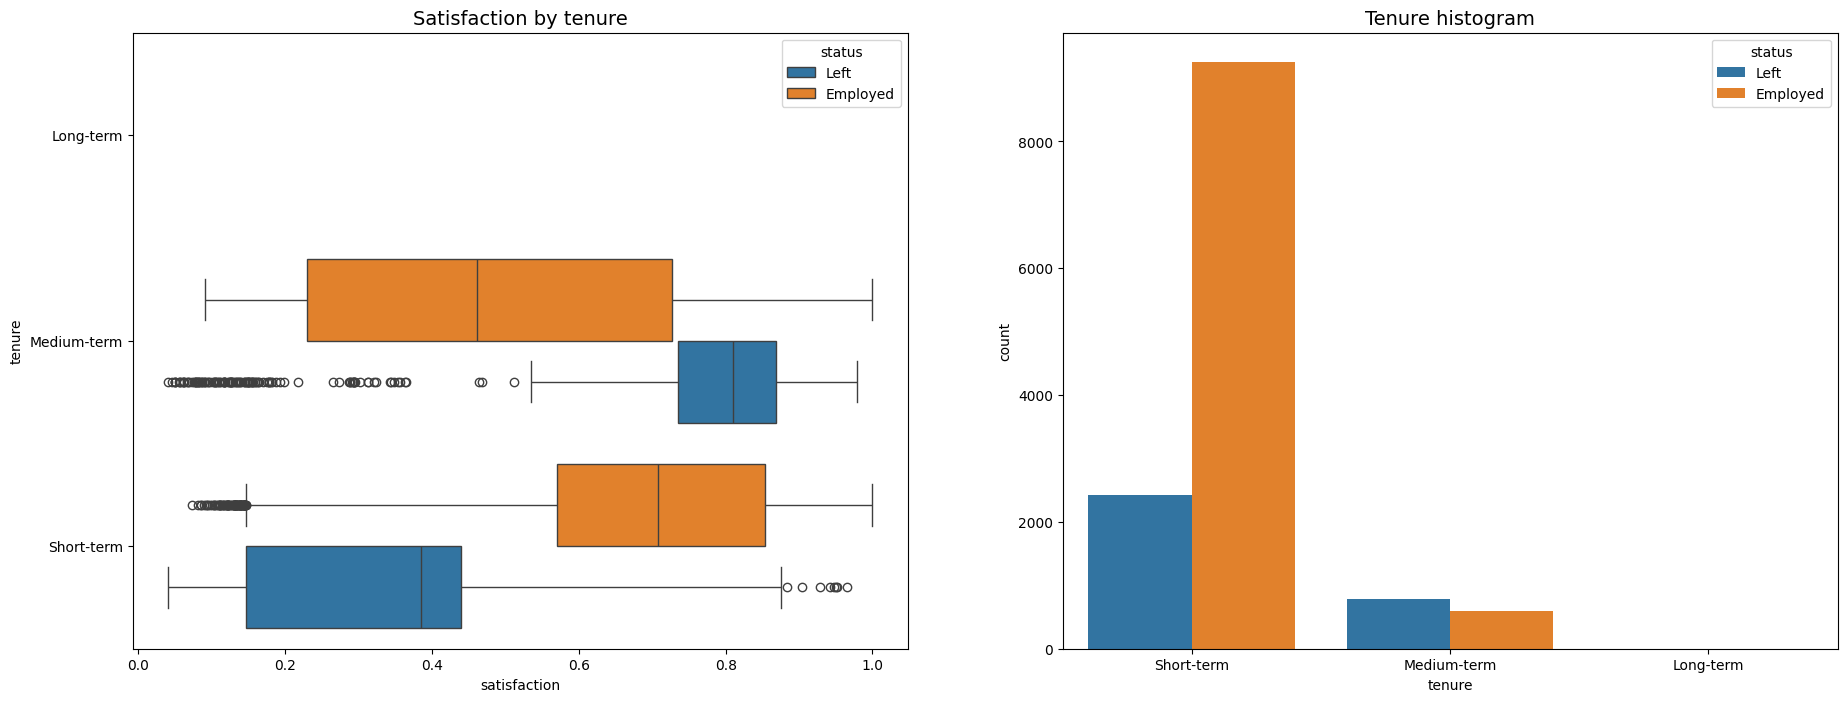

In [42]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Create boxplot showing distributions of `satisfaction` by tenure
sns.boxplot(data=df1, x='satisfaction', y='tenure', hue='status', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize=14)

# Create countplot showing distribution of `tenure` categories
sns.countplot(data=df1, x='tenure', hue='status', ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize=14)
ax[1].set_xticklabels(bin_labels)
plt.show()

## Average_Monthly_Hour vs Recently_Promoted

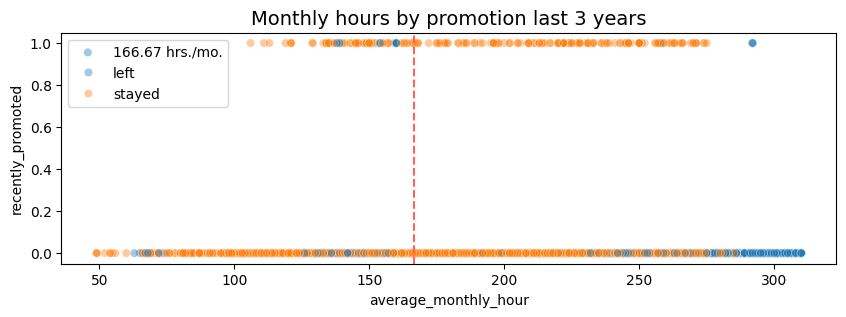

In [43]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_3years`
plt.figure(figsize=(10, 3))
sns.scatterplot(data=df1, x='average_monthly_hour', y='recently_promoted', hue='status', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.','left','stayed'])
plt.title('Monthly hours by promotion last 3 years', fontsize='14');

## Department vs Status

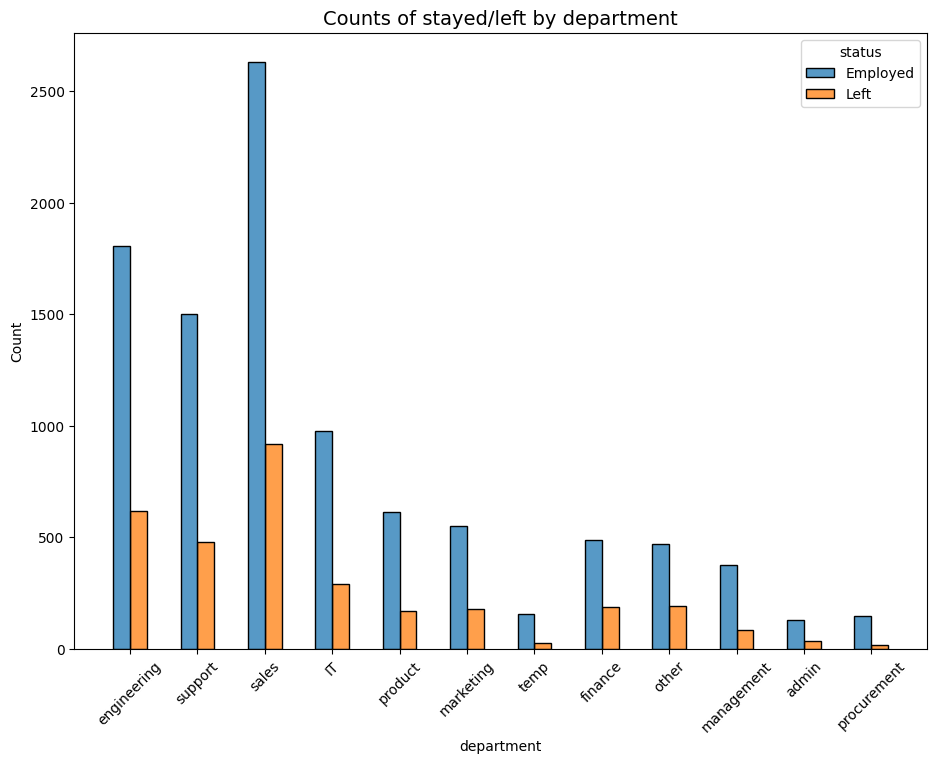

In [44]:
# Department vs Status
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='status', discrete=True,
             hue_order=['Employed', 'Left'], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);

## Work_Life_Balance

<ipython-input-45-a3c1d646d8f5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df1.groupby('work_life_balance').size()


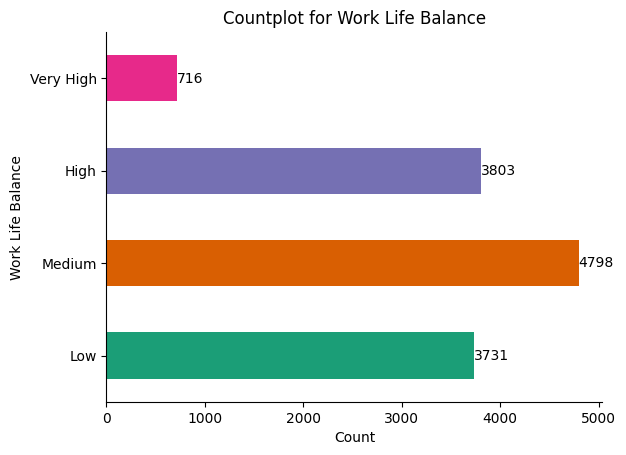

In [45]:
# Group by department and count occurrences
counts = df1.groupby('work_life_balance').size()

# Plot
ax = counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Annotating the bars with the values
for i, value in enumerate(counts):
    ax.text(value, i, f'{value}', va='center', ha='left')

# Customize plot
ax.spines[['top', 'right']].set_visible(False)
plt.xlabel('Count')
plt.ylabel('Work Life Balance')
plt.title('Countplot for Work Life Balance')

plt.show()

# Model Building

## Decision Tree

Training Accuracy: 99.94%
Test Accuracy: 95.66%

Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1970
           1       0.95      0.96      0.96      1970

    accuracy                           0.96      3940
   macro avg       0.96      0.96      0.96      3940
weighted avg       0.96      0.96      0.96      3940



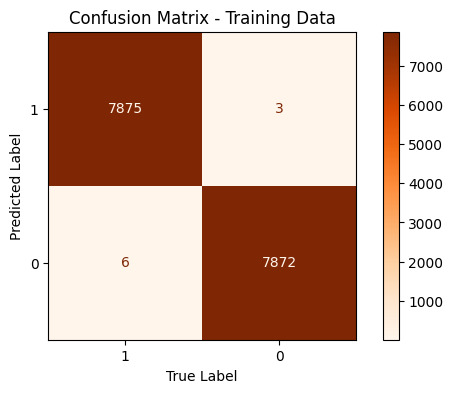

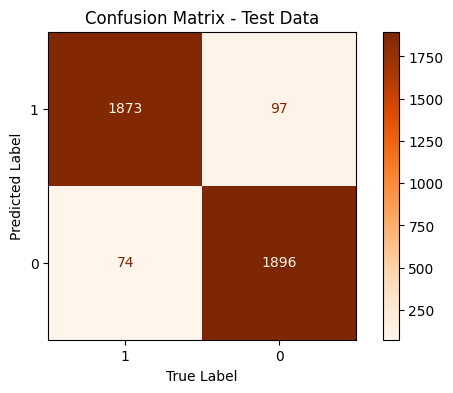

In [33]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

# Initialize and Train the Naive Bayes Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Model Prediction
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Generate Confusion Matrices
dt_train_conf_matrix = confusion_matrix(y_train, y_train_pred)
dt_test_conf_matrix = confusion_matrix(y_test, y_test_pred)

def plot_cm(conf_matrix, title, cmap='Oranges'):
    fig, ax = plt.subplots(figsize=(7, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1, 0])
    disp.plot(ax=ax, values_format='.0f', cmap=cmap)
    ax.set_title(title)
    ax.set_xlabel('True Label')
    ax.set_ylabel('Predicted Label')
    plt.show()

# Plot Confusion Matrix for Training and Test Data
plot_cm(dt_train_conf_matrix, 'Confusion Matrix - Training Data')
plot_cm(dt_test_conf_matrix, 'Confusion Matrix - Test Data')

## Logistic Regression

Training Accuracy: 87.14%
Test Accuracy: 87.11%

Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1970
           1       0.85      0.91      0.88      1970

    accuracy                           0.87      3940
   macro avg       0.87      0.87      0.87      3940
weighted avg       0.87      0.87      0.87      3940



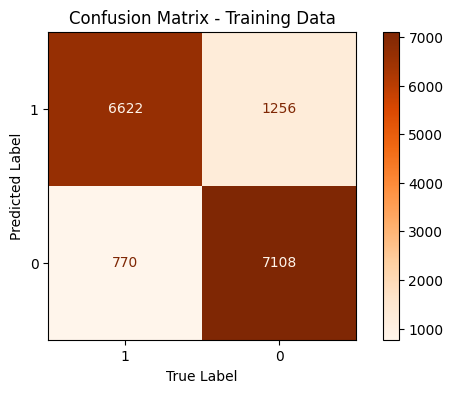

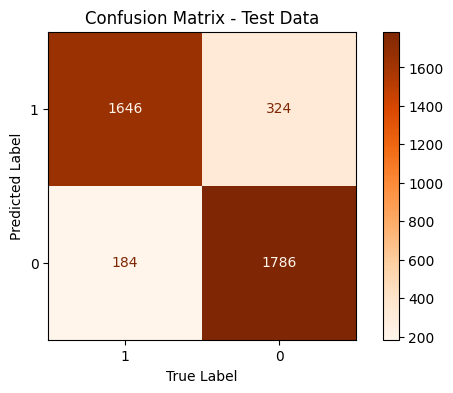

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and Train the Logistic Regression Model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Model Prediction
y_train_pred = logreg_model.predict(X_train)
y_test_pred = logreg_model.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Generate Confusion Matrices
logreg_train_conf_matrix = confusion_matrix(y_train, y_train_pred)
logreg_test_conf_matrix = confusion_matrix(y_test, y_test_pred)

def plot_cm(conf_matrix, title, cmap='Oranges'):
    fig, ax = plt.subplots(figsize=(7, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1, 0])
    disp.plot(ax=ax, values_format='.0f', cmap=cmap)
    ax.set_title(title)
    ax.set_xlabel('True Label')
    ax.set_ylabel('Predicted Label')
    plt.show()

# Plot Confusion Matrix for Training and Test Data
plot_cm(logreg_train_conf_matrix, 'Confusion Matrix - Training Data')
plot_cm(logreg_test_conf_matrix, 'Confusion Matrix - Test Data')

## Naive Bayes

Training Accuracy: 86.06%
Test Accuracy: 85.53%

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1970
           1       0.81      0.93      0.87      1970

    accuracy                           0.86      3940
   macro avg       0.86      0.86      0.85      3940
weighted avg       0.86      0.86      0.85      3940



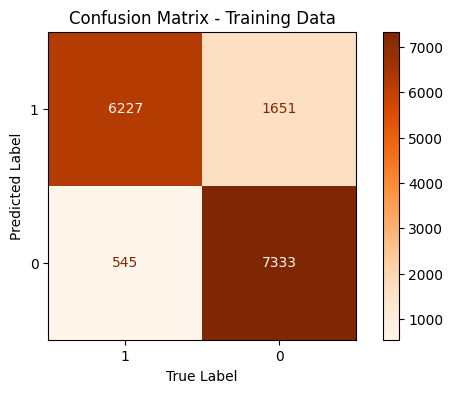

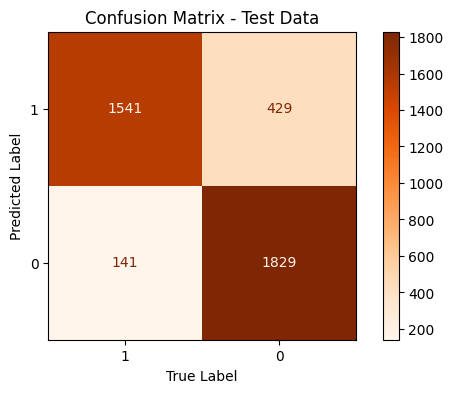

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

# Initialize and Train the Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Model Prediction
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Generate Confusion Matrices
nb_train_conf_matrix = confusion_matrix(y_train, y_train_pred)
nb_test_conf_matrix = confusion_matrix(y_test, y_test_pred)

def plot_cm(conf_matrix, title, cmap='Oranges'):
    fig, ax = plt.subplots(figsize=(7, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1, 0])
    disp.plot(ax=ax, values_format='.0f', cmap=cmap)
    ax.set_title(title)
    ax.set_xlabel('True Label')
    ax.set_ylabel('Predicted Label')
    plt.show()
# Plot Confusion Matrix for Training and Test Data
plot_cm(nb_train_conf_matrix, 'Confusion Matrix - Training Data')
plot_cm(nb_test_conf_matrix, 'Confusion Matrix - Test Data')

## SVM

Training Accuracy: 93.86%
Test Accuracy: 93.63%

Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1970
           1       0.93      0.94      0.94      1970

    accuracy                           0.94      3940
   macro avg       0.94      0.94      0.94      3940
weighted avg       0.94      0.94      0.94      3940



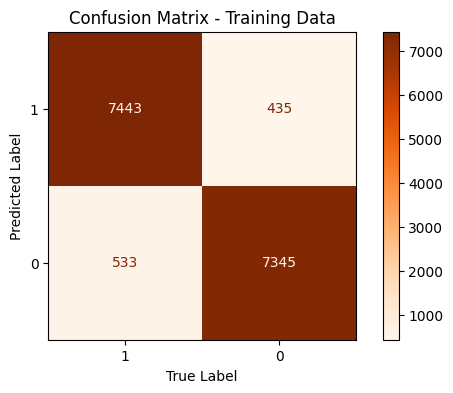

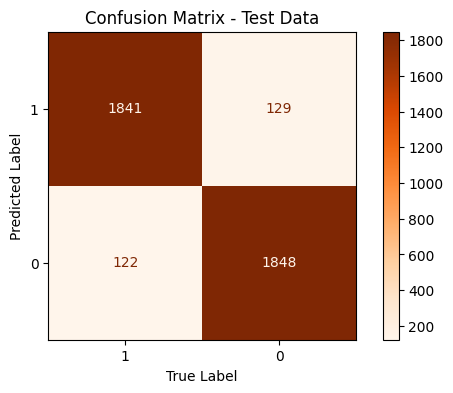

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and Train the Support Vector Machine Model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Model Prediction
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Generate Confusion Matrices
svm_train_conf_matrix = confusion_matrix(y_train, y_train_pred)
svm_test_conf_matrix = confusion_matrix(y_test, y_test_pred)

def plot_cm(conf_matrix, title, cmap='Oranges'):
    fig, ax = plt.subplots(figsize=(7, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1, 0])
    disp.plot(ax=ax, values_format='.0f', cmap=cmap)
    ax.set_title(title)
    ax.set_xlabel('True Label')
    ax.set_ylabel('Predicted Label')
    plt.show()

# Plot Confusion Matrix for Training and Test Data
plot_cm(svm_train_conf_matrix, 'Confusion Matrix - Training Data')
plot_cm(svm_test_conf_matrix, 'Confusion Matrix - Test Data')

## AdaBoost

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy: 92.76%
Test Accuracy: 92.13%

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1970
           1       0.91      0.93      0.92      1970

    accuracy                           0.92      3940
   macro avg       0.92      0.92      0.92      3940
weighted avg       0.92      0.92      0.92      3940



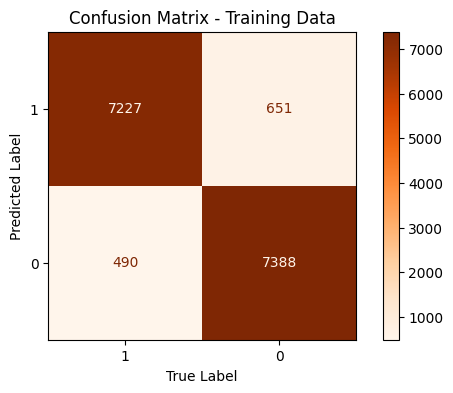

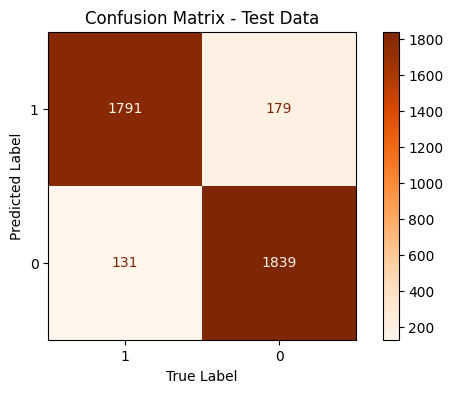

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the AdaBoostClassifier
clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train, y_train)

# Model Prediction
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Generate Confusion Matrices
adab_train_conf_matrix = confusion_matrix(y_train, y_train_pred)
adab_test_conf_matrix = confusion_matrix(y_test, y_test_pred)

def plot_cm(conf_matrix, title, cmap='Oranges'):
    fig, ax = plt.subplots(figsize=(7, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1, 0])
    disp.plot(ax=ax, values_format='.0f', cmap=cmap)
    ax.set_title(title)
    ax.set_xlabel('True Label')
    ax.set_ylabel('Predicted Label')
    plt.show()

# Plot Confusion Matrix for Training and Test Data
plot_cm(adab_train_conf_matrix, 'Confusion Matrix - Training Data')
plot_cm(adab_test_conf_matrix, 'Confusion Matrix - Test Data')

## KNN

Training Accuracy: 96.79%
Test Accuracy: 95.63%

Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1970
           1       0.95      0.96      0.96      1970

    accuracy                           0.96      3940
   macro avg       0.96      0.96      0.96      3940
weighted avg       0.96      0.96      0.96      3940



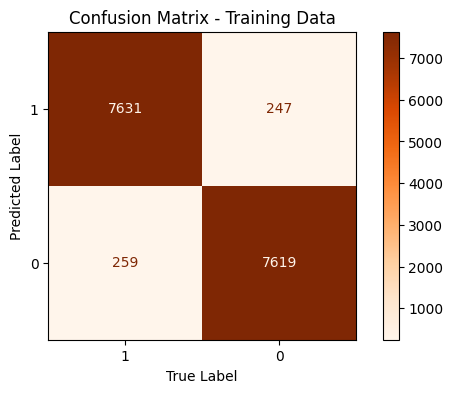

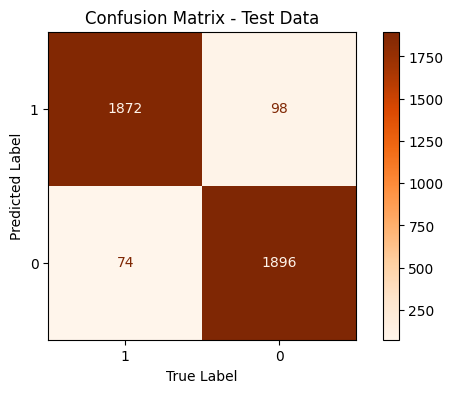

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and Train the KNN Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Model Prediction
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Generate Confusion Matrices
knn_train_conf_matrix = confusion_matrix(y_train, y_train_pred)
knn_test_conf_matrix = confusion_matrix(y_test, y_test_pred)

def plot_cm(conf_matrix, title, cmap='Oranges'):
    fig, ax = plt.subplots(figsize=(7, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1, 0])
    disp.plot(ax=ax, values_format='.0f', cmap=cmap)
    ax.set_title(title)
    ax.set_xlabel('True Label')
    ax.set_ylabel('Predicted Label')
    plt.show()

# Plot Confusion Matrix for Training and Test Data
plot_cm(knn_train_conf_matrix, 'Confusion Matrix - Training Data')
plot_cm(knn_test_conf_matrix, 'Confusion Matrix - Test Data')

## Stacking

### DT+KNN+SVM

Training Accuracy: 98.64%
Test Accuracy: 96.19%

Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1970
           1       0.96      0.96      0.96      1970

    accuracy                           0.96      3940
   macro avg       0.96      0.96      0.96      3940
weighted avg       0.96      0.96      0.96      3940



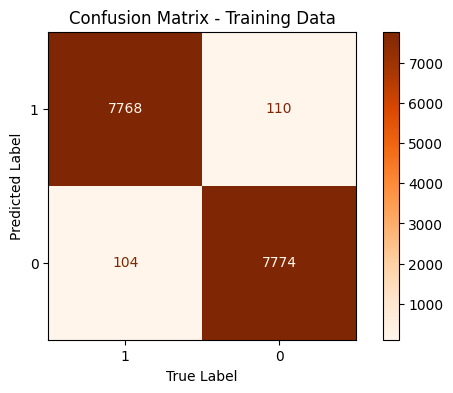

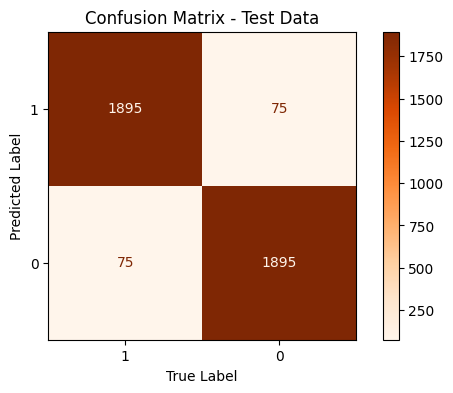

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold

# Define the base models with diversity
base_models = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('svm', SVC(random_state=42))
]

# Initialize the meta-learner
meta_learner = LogisticRegression(random_state=42)

# Create the StackingClassifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
)

# Train the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Make predictions on the test data
y_train_pred = stacking_model.predict(X_train)
y_pred = stacking_model.predict(X_test)

# Evaluate the model performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred))

# Generate Confusion Matrices
stacking_train_conf_matrix = confusion_matrix(y_train, y_train_pred)
stacking_test_conf_matrix = confusion_matrix(y_test, y_pred)

def plot_cm(conf_matrix, title, cmap='Oranges'):
    fig, ax = plt.subplots(figsize=(7, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1, 0])
    disp.plot(ax=ax, values_format='.0f', cmap=cmap)
    ax.set_title(title)
    ax.set_xlabel('True Label')
    ax.set_ylabel('Predicted Label')
    plt.show()

# Plot Confusion Matrix for Training and Test Data
plot_cm(stacking_train_conf_matrix, 'Confusion Matrix - Training Data')
plot_cm(stacking_test_conf_matrix, 'Confusion Matrix - Test Data')

## Bagging

Training Accuracy: 99.68%
Test Accuracy: 96.75%

Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1970
           1       0.97      0.96      0.97      1970

    accuracy                           0.97      3940
   macro avg       0.97      0.97      0.97      3940
weighted avg       0.97      0.97      0.97      3940



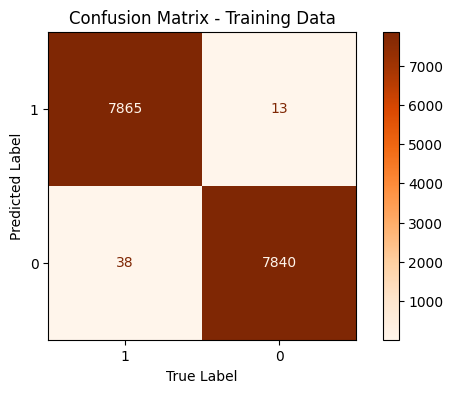

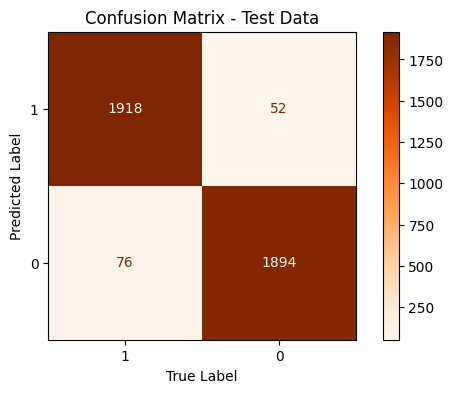

In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the Bagging model using DecisionTreeClassifier as the base estimator
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# Fit the Bagging model
bagging_model.fit(X_train, y_train)

# Make predictions on the test data
y_train_pred = bagging_model.predict(X_train)
y_pred = bagging_model.predict(X_test)

# Evaluate the model performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred))

# Generate Confusion Matrices
bagging_train_conf_matrix = confusion_matrix(y_train, y_train_pred)
bagging_test_conf_matrix = confusion_matrix(y_test, y_pred)

def plot_cm(conf_matrix, title, cmap='Oranges'):
    fig, ax = plt.subplots(figsize=(7, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1, 0])
    disp.plot(ax=ax, values_format='.0f', cmap=cmap)
    ax.set_title(title)
    ax.set_xlabel('True Label')
    ax.set_ylabel('Predicted Label')
    plt.show()

# Plot Confusion Matrix for Training and Test Data
plot_cm(bagging_train_conf_matrix, 'Confusion Matrix - Training Data')
plot_cm(bagging_test_conf_matrix, 'Confusion Matrix - Test Data')

## Hyperparameter Tuning

### Decision Tree

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 11, 'min_samples_split': 9, 'splitter': 'best'}
Best cross-validation score: 0.96
Training Accuracy: 96.78%
Test Accuracy: 95.69%

Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1970
           1       0.95      0.96      0.96      1970

    accuracy                           0.96      3940
   macro avg       0.96      0.96      0.96      3940
weighted avg       0.96      0.96      0.96      3940



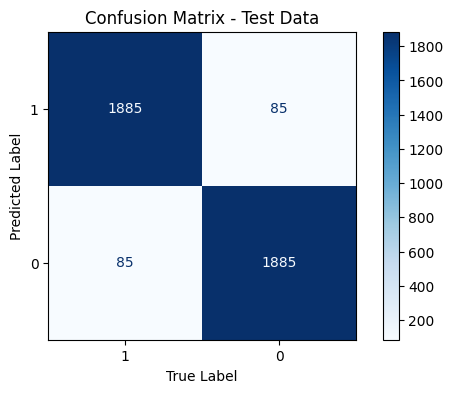

In [41]:
from scipy.stats import uniform, randint

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters distribution for tuning
param_dist = {
    'max_depth': randint(1, 20),  # The maximum depth of the tree
    'min_samples_split': randint(2, 20),  # The minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),  # The minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'],  # The function to measure the quality of a split
    'splitter': ['best', 'random']  # The strategy used to choose the split at each node
}

# Use RandomizedSearchCV to search for the best hyperparameters
random_search = RandomizedSearchCV(estimator=dt_model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose=2)

# Fit the model with the best parameters found
random_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

best_dt_model = random_search.best_estimator_

y_train_pred = best_dt_model.predict(X_train)
y_pred = best_dt_model.predict(X_test)

# Evaluate the model performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Generate Confusion Matrices
dt_train_conf_matrix = confusion_matrix(y_train, y_train_pred)
dt_test_conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=dt_test_conf_matrix, display_labels=[1, 0])
disp.plot(ax=ax, values_format='.0f', cmap='Blues')
ax.set_title('Confusion Matrix - Test Data')
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
plt.show()

### Logistics Regression

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 0.01}
Best cross-validation score: 0.87
Training Accuracy: 87.37%
Test Accuracy: 87.34%

Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1970
           1       0.95      0.96      0.96      1970

    accuracy                           0.96      3940
   macro avg       0.96      0.96      0.96      3940
weighted avg       0.96      0.96      0.96      3940



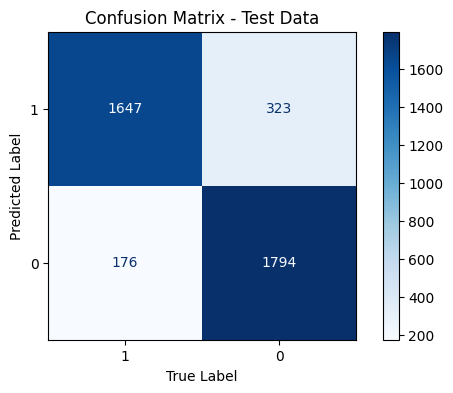

In [42]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Define the hyperparameters distribution for tuning
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Penalty type
    'solver': ['liblinear', 'saga'],  # Solvers that support the penalties
}

# Use RandomizedSearchCV to search for the best hyperparameters
random_search = RandomizedSearchCV(estimator=logreg_model, param_distributions=param_dist, cv=5, n_jobs=-1, random_state=42, verbose=2)

# Fit the model with the best parameters found
random_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

best_logreg_model = random_search.best_estimator_

y_train_pred = best_logreg_model.predict(X_train)
y_pred = best_logreg_model.predict(X_test)

# Evaluate the model performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Generate Confusion Matrices
logreg_train_conf_matrix = confusion_matrix(y_train, y_train_pred)
logreg_test_conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=logreg_test_conf_matrix, display_labels=[1, 0])
disp.plot(ax=ax, values_format='.0f', cmap='Blues')
ax.set_title('Confusion Matrix - Test Data')
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
plt.show()

### Naive Bayes

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'var_smoothing': 4.745401188473625e-10}
Best cross-validation score: 0.86
Training Accuracy: 86.06%
Test Accuracy: 85.53%

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1970
           1       0.81      0.93      0.87      1970

    accuracy                           0.86      3940
   macro avg       0.86      0.86      0.85      3940
weighted avg       0.86      0.86      0.85      3940



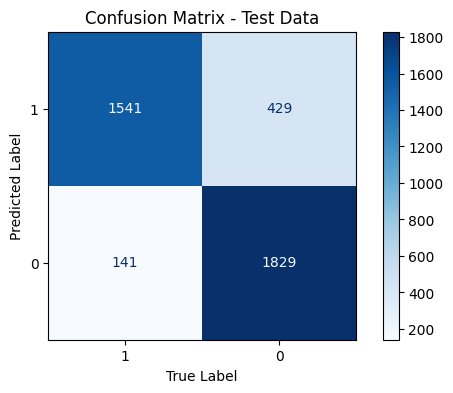

In [43]:
# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Define the hyperparameters distribution for tuning
param_dist = {
    'var_smoothing': uniform(1e-10, 1e-9)
}

# Use RandomizedSearchCV to search for the best hyperparameters
random_search = RandomizedSearchCV(estimator=nb_model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose=2)

# Fit the model with the best parameters found
random_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

best_nb_model = random_search.best_estimator_

y_train_pred = best_nb_model.predict(X_train)
y_pred = best_nb_model.predict(X_test)

# Evaluate the model performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred))

# Generate Confusion Matrices
nb_train_conf_matrix = confusion_matrix(y_train, y_train_pred)
nb_test_conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=nb_test_conf_matrix, display_labels=[1, 0])
disp.plot(ax=ax, values_format='.0f', cmap='Blues')
ax.set_title('Confusion Matrix - Test Data')
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
plt.show()

### SVM

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 6.068501579464869, 'coef0': 0.44583275285359114, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Best cross-validation score: 0.94
Training Accuracy: 94.54%
Test Accuracy: 93.96%

Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1970
           1       0.95      0.96      0.96      1970

    accuracy                           0.96      3940
   macro avg       0.96      0.96      0.96      3940
weighted avg       0.96      0.96      0.96      3940



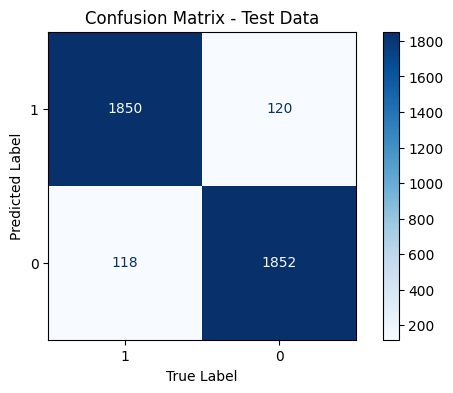

In [44]:
# Initialize the SVM model
svm_model = SVC(random_state=42)

# Define the hyperparameters distribution for tuning
param_dist = {
    'C': uniform(0.1, 10),  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
    'degree': randint(2, 5),  # Degree of the polynomial kernel function (if using 'poly')
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'coef0': uniform(0, 1)  # Independent term in kernel function (for 'poly' and 'sigmoid')
}

# Use RandomizedSearchCV to search for the best hyperparameters
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose=2)

# Fit the model with the best parameters found
random_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

best_svm_model = random_search.best_estimator_

y_train_pred = best_svm_model.predict(X_train)
y_pred = best_svm_model.predict(X_test)

# Evaluate the model performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Generate Confusion Matrices
svm_train_conf_matrix = confusion_matrix(y_train, y_train_pred)
svm_test_conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=svm_test_conf_matrix, display_labels=[1, 0])
disp.plot(ax=ax, values_format='.0f', cmap='Blues')
ax.set_title('Confusion Matrix - Test Data')
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
plt.show()

### AdaBoost

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 1.9498197043239887, 'n_estimators': 167}
Best cross-validation score: 0.93
Training Accuracy: 93.63%
Test Accuracy: 93.22%

Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1970
           1       0.91      0.96      0.93      1970

    accuracy                           0.93      3940
   macro avg       0.93      0.93      0.93      3940
weighted avg       0.93      0.93      0.93      3940



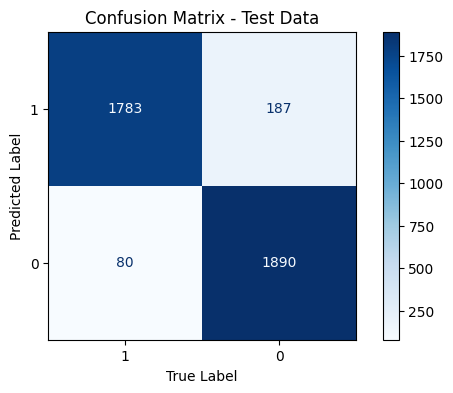

In [45]:
# Initialize the AdaBoostClassifier
clf = AdaBoostClassifier(random_state=42)

# Define the hyperparameters distribution for tuning
param_dist = {
    'n_estimators': randint(10, 200),  # Number of weak learners (trees)
    'learning_rate': uniform(0.01, 2),  # Learning rate: small values result in more conservative learning
    'algorithm': ['SAMME', 'SAMME.R']  # Algorithm type
}

# Use RandomizedSearchCV to search for the best hyperparameters
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose=2)

# Fit the model with the best parameters found
random_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

best_clf_model = random_search.best_estimator_

y_train_pred = best_clf_model.predict(X_train)
y_pred = best_clf_model.predict(X_test)

# Evaluate the model performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred))

# Generate Confusion Matrices
adab_train_conf_matrix = confusion_matrix(y_train, y_train_pred)
adab_test_conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=adab_test_conf_matrix, display_labels=[1, 0])
disp.plot(ax=ax, values_format='.0f', cmap='Blues')
ax.set_title('Confusion Matrix - Test Data')
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
plt.show()

### KNN

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
Best cross-validation score: 0.96
Training Accuracy: 99.95%
Test Accuracy: 96.07%

Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1970
           1       0.96      0.96      0.96      1970

    accuracy                           0.96      3940
   macro avg       0.96      0.96      0.96      3940
weighted avg       0.96      0.96      0.96      3940



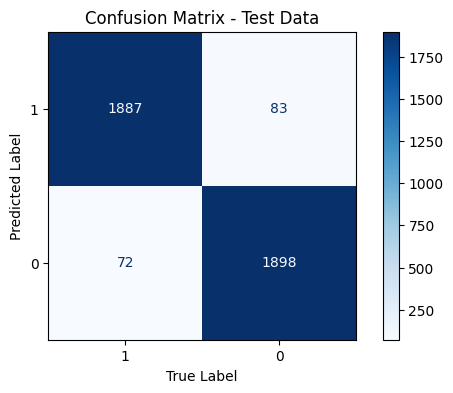

In [46]:
# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Define the hyperparameters distribution for tuning
param_dist = {
    'n_neighbors': randint(1, 20),  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
    'p': randint(1, 5)  # Power parameter for Minkowski metric
}

# Use RandomizedSearchCV to search for the best hyperparameters
random_search = RandomizedSearchCV(estimator=knn_model, param_distributions=param_dist, n_iter=10, cv=5,
                                   n_jobs=-1, random_state=42, verbose=2)

# Fit the model with the best parameters found
random_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

best_knn_model = random_search.best_estimator_

y_train_pred = best_knn_model.predict(X_train)
y_pred = best_knn_model.predict(X_test)

# Evaluate the model performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred))

# Generate Confusion Matrices
knn_train_conf_matrix = confusion_matrix(y_train, y_train_pred)
knn_test_conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=knn_test_conf_matrix, display_labels=[1, 0])
disp.plot(ax=ax, values_format='.0f', cmap='Blues')
ax.set_title('Confusion Matrix - Test Data')
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
plt.show()

### Stacking

#### DT+KNN+SVM

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'dt__max_depth': 9, 'dt__min_samples_split': 3, 'knn__n_neighbors': 4, 'svm__C': 9.522017556848526, 'svm__kernel': 'rbf'}
Best cross-validation score: 0.96
Training Accuracy: 97.66%
Test Accuracy: 96.22%

Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1970
           1       0.97      0.96      0.96      1970

    accuracy                           0.96      3940
   macro avg       0.96      0.96      0.96      3940
weighted avg       0.96      0.96      0.96      3940



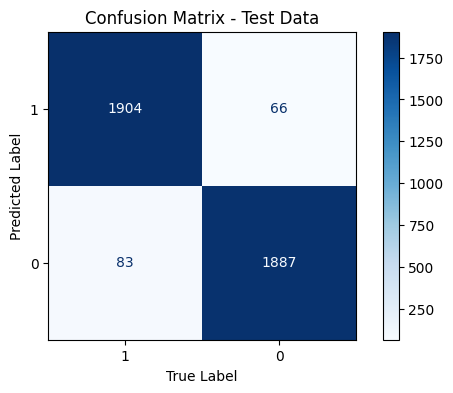

In [47]:
from sklearn.model_selection import StratifiedKFold

# Define the base models with diverse hyperparameter spaces
base_models = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('svm', SVC(random_state=42))
]

# Hyperparameter distributions for each base model
param_grid = {
    'dt__max_depth': randint(3, 20),
    'dt__min_samples_split': randint(2, 10),
    'knn__n_neighbors': randint(1, 30),
    'svm__C': uniform(0.1, 10),
    'svm__kernel': ['linear', 'rbf', 'poly']
}

# Meta-learner hyperparameters
meta_learner = LogisticRegression(random_state=42)

# Create the StackingClassifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
)

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=stacking_model,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=2
)

# Fit the random search model on the training data
random_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

best_stacking_model = random_search.best_estimator_

y_train_pred = best_stacking_model.predict(X_train)
y_pred = best_stacking_model.predict(X_test)

# Evaluate the model performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred))

# Generate Confusion Matrices
stacking_train_conf_matrix = confusion_matrix(y_train, y_train_pred)
stacking_test_conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=stacking_test_conf_matrix, display_labels=[1, 0])
disp.plot(ax=ax, values_format='.0f', cmap='Blues')
ax.set_title('Confusion Matrix - Test Data')
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
plt.show()


### Bagging

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 11, 'min_samples_split': 9, 'splitter': 'best'}
Best cross-validation score: 0.96
Training Accuracy: 96.78%
Test Accuracy: 95.69%

Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1970
           1       0.96      0.96      0.96      1970

    accuracy                           0.96      3940
   macro avg       0.96      0.96      0.96      3940
weighted avg       0.96      0.96      0.96      3940



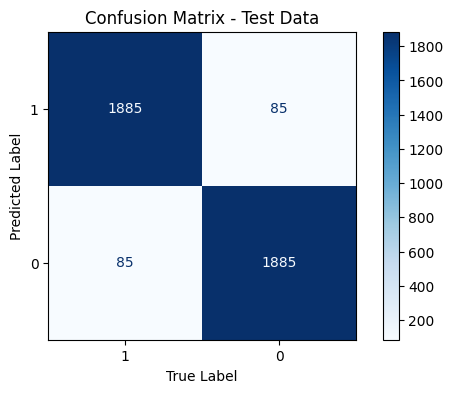

In [66]:
# Define the Bagging model
bagging_model = DecisionTreeClassifier(random_state = 42)

# Define the hyperparameter space for tuning
param_dist = {
    'max_depth': randint(1, 20),  # The maximum depth of the tree
    'min_samples_split': randint(2, 20),  # The minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),  # The minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'],  # The function to measure the quality of a split
    'splitter': ['best', 'random']  # The strategy used to choose the split at each node
}

# Use RandomizedSearchCV to search for the best hyperparameters
random_search = RandomizedSearchCV(estimator=bagging_model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose=2)

# Fit the model with the best parameters found
random_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

best_bagging_model = random_search.best_estimator_

y_train_pred = best_bagging_model.predict(X_train)
y_pred = best_bagging_model.predict(X_test)

# Evaluate the model performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred))

# Generate Confusion Matrices
bagging_train_conf_matrix = confusion_matrix(y_train, y_train_pred)
bagging_test_conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=bagging_test_conf_matrix, display_labels=[1, 0])
disp.plot(ax=ax, values_format='.0f', cmap='Blues')
ax.set_title('Confusion Matrix - Test Data')
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
plt.show()

# Model Deployment

## Stacking

Accuracy: 96.22%
Confusion Matrix: 
 [[1904   66]
 [  83 1887]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1970
           1       0.97      0.96      0.96      1970

    accuracy                           0.96      3940
   macro avg       0.96      0.96      0.96      3940
weighted avg       0.96      0.96      0.96      3940



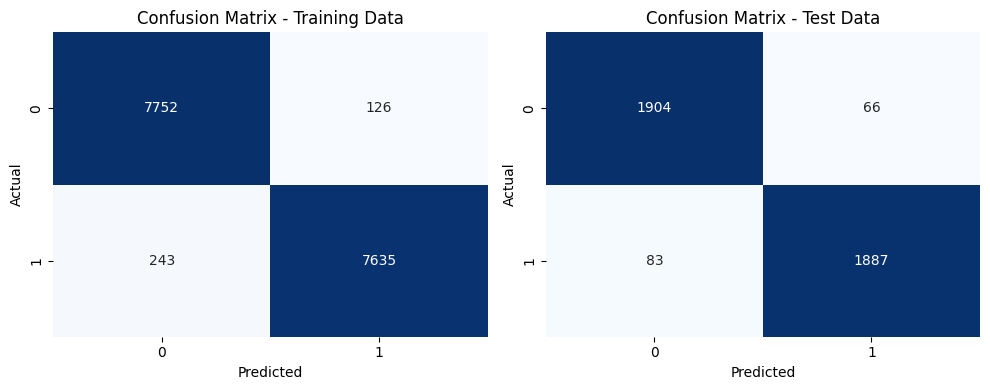

In [48]:
from sklearn.model_selection import StratifiedKFold

# Based on the result, Stacking has the best performance.
# To deploy, following value will be applied to build new Stacking Model

# Rebuild the base models with the best hyperparameters
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=9, min_samples_split=3, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=4)),
    ('svm', SVC(C=9.522017556848526, kernel='rbf', random_state=42))
]

# Meta-learner
meta_learner = LogisticRegression(random_state=42)

# Create the StackingClassifier with the best hyperparameters
stack_tuning_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
)

# Train the model (assuming X_train and y_train are already defined)
stack_tuning_model.fit(X_train, y_train)

y_train_pred = stack_tuning_model.predict(X_train)
y_pred = stack_tuning_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix: \n", confusion)
print("Classification Report: \n", report)

# Generate Confusion Matrices
stacking_train_conf_matrix = confusion_matrix(y_train, y_train_pred)
stacking_test_conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix for Training Data
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(stacking_train_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot Confusion Matrix for Test Data
plt.subplot(1, 2, 2)
sns.heatmap(stacking_test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

### Stacking - LIME (individual instance)

In [49]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=da857c581b2059c57915b7ceb2599147c940f505a9dfc43415aa68c80ebdd3e1
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [50]:
import lime
import lime.lime_tabular
import numpy as np

# Create the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train), feature_names=X_train.columns,
    class_names=np.unique(y_train).astype(str),mode='classification')

# Pick an instance from the test set to explain
i = 905
instance = X_test.iloc[i].values.reshape(1, -1)

# Generate explanation for the selected instance
explanation = explainer.explain_instance(
    data_row=instance.flatten(), predict_fn=stack_tuning_model.predict_proba)

# Show the explanation
explanation.show_in_notebook(show_table=True, show_all=False)

# Create a comparison DataFrame
comparison_df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})

# Add a column to indicate whether the prediction was correct
comparison_df['Correct'] = comparison_df['Actual'] == comparison_df['Predicted']

# Display the comparison DataFrame
print(comparison_df)

# Optionally, you can filter out correct or incorrect predictions
correct_predictions = comparison_df[comparison_df['Correct'] == True]
incorrect_predictions = comparison_df[comparison_df['Correct'] == False]

print(f"\nNumber of correct predictions: {len(correct_predictions)}")
print(f"Number of incorrect predictions: {len(incorrect_predictions)}")
# Show incorrect predictions
print("\nIncorrect Predictions:")
print(incorrect_predictions)
accuracy = comparison_df['Correct'].mean() * 100
print(f"Overall Accuracy: {accuracy:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


       Actual  Predicted  Correct
16653       1          1     True
3773        0          0     True
14066       1          0    False
6211        1          1     True
18862       1          1     True
...       ...        ...      ...
17346       1          1     True
12360       0          0     True
16241       1          1     True
12028       0          0     True
15992       1          1     True

[3940 rows x 3 columns]

Number of correct predictions: 3791
Number of incorrect predictions: 149

Incorrect Predictions:
       Actual  Predicted  Correct
14066       1          0    False
18676       1          0    False
7973        0          1    False
8965        1          0    False
7188        1          0    False
...       ...        ...      ...
8808        0          1    False
2925        1          0    False
10065       0          1    False
1702        0          1    False
2156        1          0    False

[149 rows x 3 columns]
Overall Accuracy: 96.22%


### Summary Plot

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


  0%|          | 0/3940 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: Use

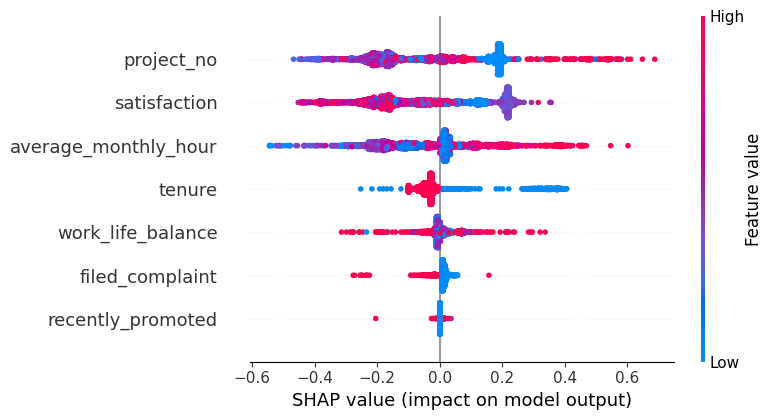

In [ ]:
import shap
import numpy as np
import pandas as pd

# Use a fixed background dataset from X_train for SHAP explanations
background = X_train.iloc[:50, :]

# Initialize SHAP KernelExplainer using the trained stacking model
# To increase consistency, we also set a fixed seed in the KernelExplainer if necessary
explainer = shap.KernelExplainer(stack_tuning_model.predict, background)

# Calculate SHAP values for the test dataset (X_test)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP summary plot to interpret feature importance
shap.summary_plot(shap_values, X_test, feature_names=X_train.columns)

# Load JS visualization code to notebook
shap.initjs()

### Dependence Plot

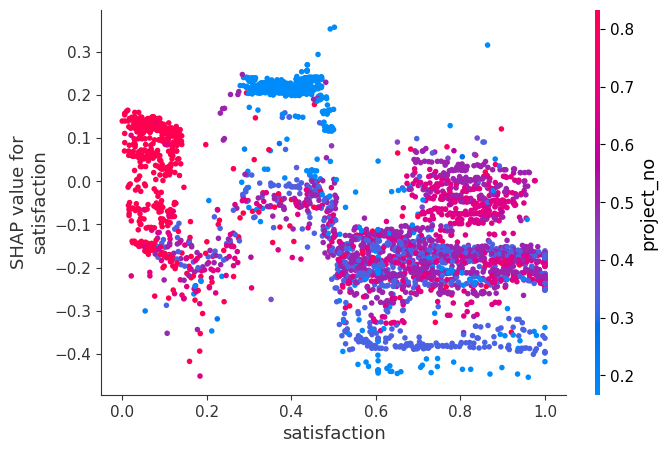

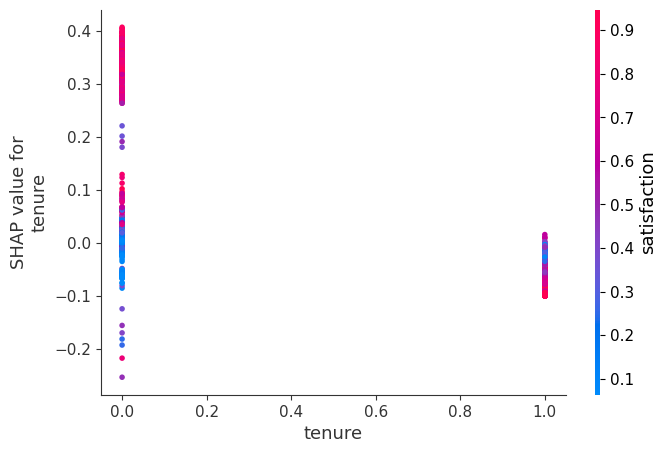

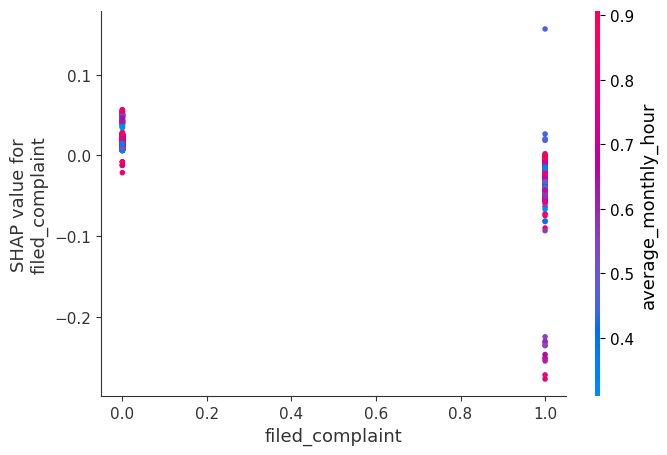

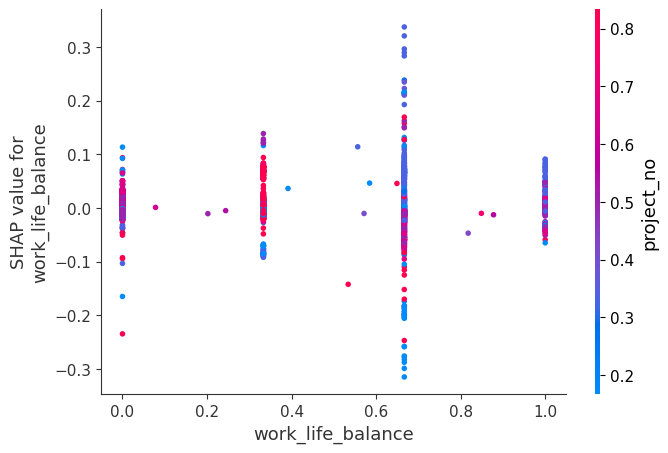

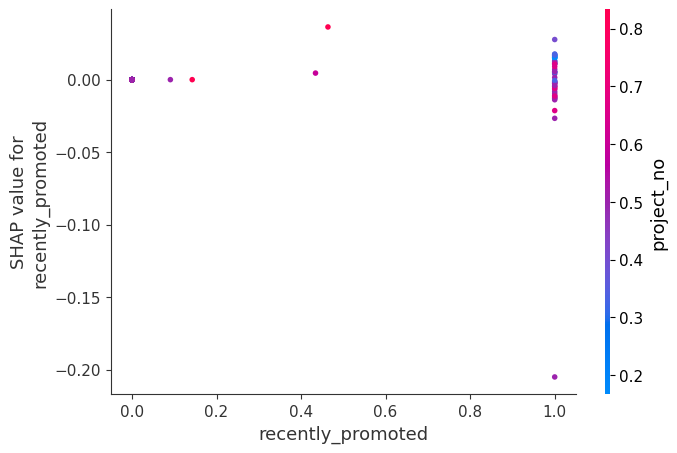

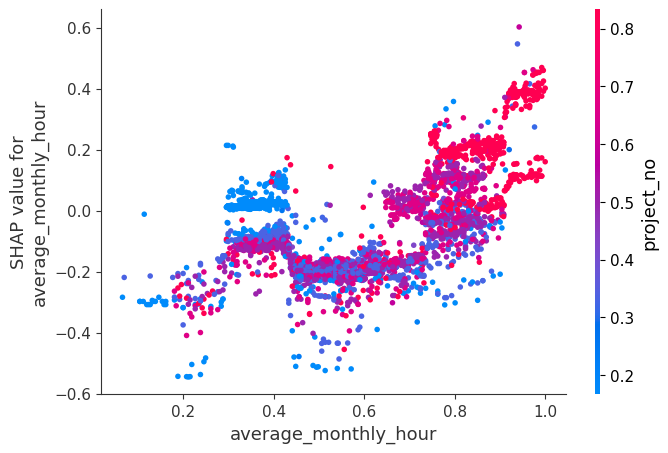

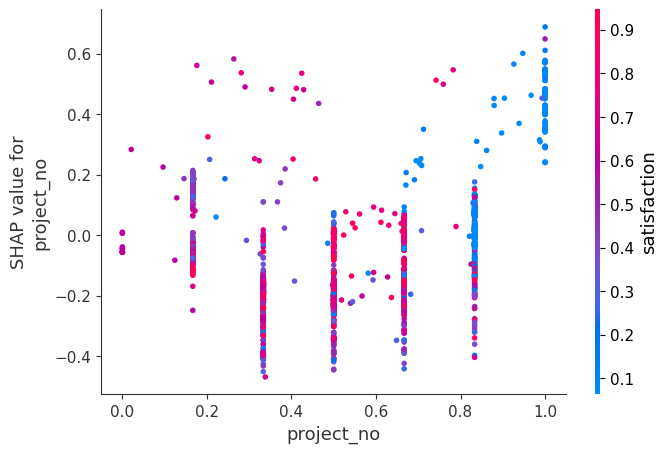

In [ ]:
# Generate SHAP dependence plots for each feature
for i, feature in enumerate(X_train.columns):
    shap.dependence_plot(i, shap_values, X_test, feature_names=X_train.columns)

### Permutation

project_no              0.316249
satisfaction            0.305964
average_monthly_hour    0.215462
tenure                  0.108782
work_life_balance       0.019822
filed_complaint         0.003178
recently_promoted       0.000523
dtype: float64


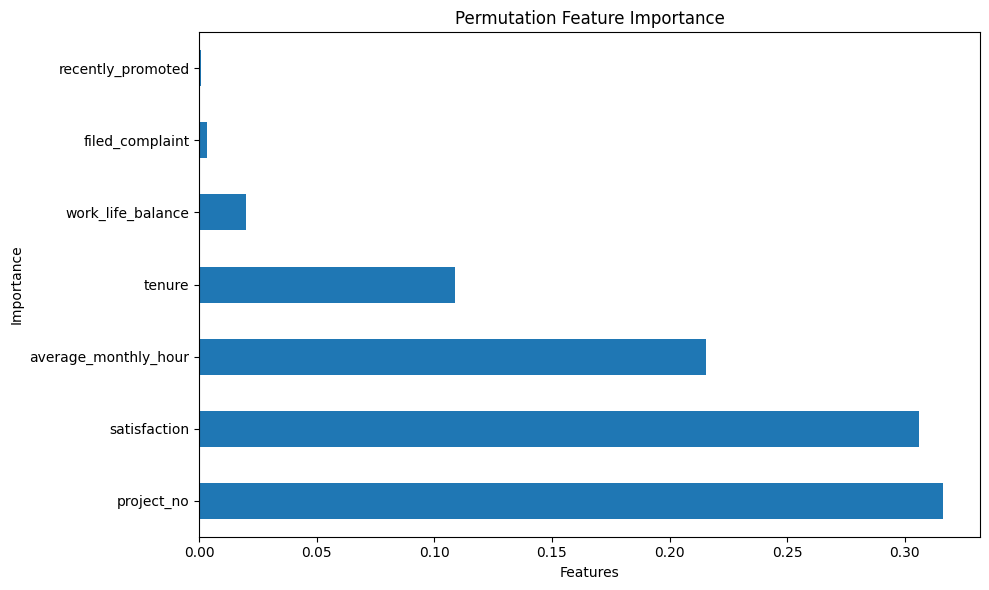

In [71]:
from sklearn.inspection import permutation_importance
result = permutation_importance(stack_tuning_model, X_test, y_test, n_repeats=50, random_state=42)
perm_importance = pd.Series(result.importances_mean, index=X_train.columns)
perm_importance.sort_values(ascending=False, inplace=True)

print(perm_importance)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
perm_importance.plot(kind='barh')
plt.title('Permutation Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

## Save and Load model

In [51]:
!pip install scikit-learn shap
!pip install streamlit
!pip install shap matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [60]:
import joblib
# Save the model to disk using joblib
joblib.dump(stack_tuning_model, 'stack_tuning_model.pkl')

['stack_tuning_model.pkl']

In [63]:
from google.colab import files
files.download('stack_tuning_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Streamlit

In [55]:
%%writefile EmpAttr_Pred.py
import streamlit as st
import joblib
import numpy as np
import shap
import matplotlib.pyplot as plt
import pandas as pd
import tempfile
import os

# Load the trained model using joblib
model = joblib.load('stack_tuning_model.pkl')

# Define the Streamlit app
def main():

    st.title("Employee Attrition Prediction")

    # Collect user input
    st.header("Enter the following features to predict employee attrition:")

    name = st.text_input('Name'),

    id = st.text_input('Employee ID'),

    department = st.selectbox('Department', options=['IT', 'admin', 'engineering', 'finance',
    'management', 'marketing', 'procurement', 'product', 'sales', 'support', 'temp'])

    filed_complaint = st.selectbox('Filed Complaint in Last Three Years',options=['Yes','No'])

    recently_promoted = st.selectbox('Receive Promotion in Last Three Years',options=['Yes','No'])

    salary = st.number_input('Salary',min_value=0)

    satisfaction = st.number_input('Satisfaction Level (e.g., 0.1 - 1.0)', min_value=0.0, max_value=1.0, step=0.01)

    average_monthly_hour = st.number_input('Average Monthly Hours', min_value=0, step=1)

    tenure = st.number_input('Tenure (in years)', min_value=0, step=1)

    project_no = st.number_input('Number of Projects', min_value=0, step=1)

    last_evaluation = st.number_input('Last Evaluation (e.g., 0.1 - 1.0)', min_value=0.0, max_value=1.0, step=0.01)

    # Calculate 'work_life_balance' from 'satisfaction' and 'average_working_hour'
    work_life_balance = satisfaction * average_monthly_hour

    # Display the calculated 'project_evaluation' as a read-only input
    st.text_input('Work Life Balance', value=f"{work_life_balance:.2f}", disabled=True)

    # Encode the department as an integer
    department_mapping = {
        'IT': 0, 'admin': 1, 'engineering': 2, 'finance': 3, 'management': 4,
        'marketing': 5, 'other' : 6, 'procurement': 7, 'product': 8, 'sales': 9, 'support': 10, 'temp': 11
    }
    department_encoded = department_mapping.get(department, -1)

    complaint_mapping = {'Yes':1,'No':0}
    complaint_encoded = complaint_mapping.get(filed_complaint, -1)

    promotion_mapping = {'Yes':1,'No':0}
    promotion_encoded = promotion_mapping.get(recently_promoted, -1)

    # Initialize the SHAP explainer with a lambda function to ensure correct interpretation
    explainer = shap.KernelExplainer(lambda x: model.predict_proba(x)[:, 1], np.zeros((1, 7)))

    # Preprocess the input (if needed)
    input_features = np.array([[satisfaction, average_monthly_hour, work_life_balance, tenure, project_no, promotion_encoded,complaint_encoded]])

    feature_names = ['Satisfaction Level', 'Average Monthly Hours', 'Work Life Balance',
    'Tenure', 'Number of Projects', 'Promotion', 'Filed Complaint']

    # Create a button for prediction
    if st.button("Predict"):

        # Predict the probability of attrition
        prediction_proba = model.predict_proba(input_features)
        likelihood = prediction_proba[0][1] * 100

        # Probability Gauge or Progress Bar
        st.subheader("Attrition Likelihood Gauge")
        st.write(f"The likelihood of the employee leaving the company is : **{likelihood:.2f}%**")
        st.progress(int(likelihood))

        # Perform SHAP analysis
        shap_values = explainer.shap_values(input_features)

        # Convert SHAP values to a DataFrame for better readability
        shap_values_df = pd.DataFrame(shap_values, columns=feature_names)
        st.write("SHAP Values:", shap_values_df)

        # Display the SHAP values for the input
        st.header("SHAP Analysis")
        st.write("The SHAP values explain the contribution of each feature to the prediction.")

        # SHAP Summary Plot
        st.subheader("SHAP Summary Plot")
        fig_summary, ax_summary = plt.subplots()
        shap.summary_plot(shap_values, input_features, feature_names=feature_names,plot_type="bar", show=False)
        ax_summary.set_xlabel("SHAP Value (Impact on Model Output)")
        st.pyplot(fig_summary)

        # SHAP Decision Plot
        st.subheader("SHAP Decision Plot")
        fig_decision = plt.figure()
        shap.decision_plot(explainer.expected_value, shap_values, input_features, feature_names=feature_names)
        st.pyplot(fig_decision)

        st.subheader("SHAP Force Plot")
        with tempfile.NamedTemporaryFile(delete=False, suffix=".png") as tmpfile:
            # Generate the force plot
            fig, ax = plt.subplots(figsize=(12, 5))
            shap.force_plot(explainer.expected_value, shap_values, input_features, feature_names=feature_names, matplotlib=True, show=False)

            # Add labels for feature values
            for i in range(len(feature_names)):
                ax.text(0.5, 0.8 - (i * 0.1), f"{feature_names[i]} = {input_features[0][i]:.2f}", transform=ax.transAxes)

            plt.savefig(tmpfile.name, bbox_inches='tight')
            plt.close()
            st.image(tmpfile.name)

        recommendations = []
        if satisfaction < 0.55:
            recommendations.append("**Recommendation:** The employee's satisfaction level is low. Consider offering career development"
            "opportunities, recognition programs, or flexible working arrangements to improve their satisfaction.")
        if average_monthly_hour > 166.67:
            recommendations.append("**Recommendation:** The employee has high working hours. Consider discussing work-life balance options"
             "or redistributing workload to prevent burnout.")
        if recently_promoted == 'No' and tenure > 2:
            recommendations.append("**Recommendation:** The employee has not been promoted in the last three years despite a long tenure."
             "Consider providing opportunities for advancement or discussing career growth plans with them.")
        if filed_complaint == 'Yes':
            recommendations.append("**Recommendation:** The employee has filed a complaint in the last three years."
            "Ensure that the issue has been resolved satisfactorily and provide ongoing support to address any remaining concerns.")
        if work_life_balance < 60:
            recommendations.append("**Recommendation:** The employee's work-life balance appears to be poor. Consider reducing workload "
            "or offering more flexible working hours to improve their overall well-being.")
        recommendations_text = "\n\n".join([f"{rec}" for rec in recommendations]) if recommendations else "No specific recommendations."
        recommendations_csv = "; ".join(recommendations) if recommendations else "No specific recommendations."

        # Save the input features to a CSV file
        save_data = pd.DataFrame(input_features, columns=feature_names)
        save_data['Name'] = name
        save_data['Employee ID'] = id
        save_data['Department'] = department
        save_data['Satisfaction Level'] = satisfaction
        save_data['Average Monthly Hours'] = average_monthly_hour
        save_data['Work Life Balance'] = work_life_balance
        save_data['Tenure'] = tenure
        save_data['Number of Projects'] = project_no
        save_data['Promotion'] = promotion_encoded
        save_data['Filed Complaint'] = complaint_encoded
        save_data['Last Evaluation'] = last_evaluation
        save_data['Prediction Probability'] = likelihood
        save_data['Recommendations'] = recommendations_csv

        if os.path.exists('employee_predictions.csv'):
            save_data.to_csv('employee_predictions.csv', mode='a', header=False, index=False)
        else:
            save_data.to_csv('employee_predictions.csv', mode='w', header=True, index=False)
        # Recommendations based on key features
        st.subheader("Recommendations")
        st.write(recommendations_text)

if __name__ == "__main__":
    main()

Writing EmpAttr_Pred.py


# Department Mapping

In [56]:
df1['department_encoded'] = label_encoder.fit_transform(df1['department'])

# Create a mapping of department labels to encoded values
department_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

department_mapping

{'IT': 0,
 'admin': 1,
 'engineering': 2,
 'finance': 3,
 'management': 4,
 'marketing': 5,
 'other': 6,
 'procurement': 7,
 'product': 8,
 'sales': 9,
 'support': 10,
 'temp': 11}

In [57]:
from google.colab import files
files.download('EmpAttr_Pred.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>